In [ ]:
pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 888.5 kB/s eta 0:00:00


#<b>Hotel Cancellation Prediction 🏨

-------------------
---------------------

# <b>1. Introduction</b>  

-------------------
---------------------

## <b>1.1. Business Understanding

###**Business Background**

According to the [Hospitality Net](https://www.hospitalitynet.org/opinion/4082318.html), there are four segments of the hospitality industry: Food and Beverages, Travel and Tourism, Lodging, and Recreation. **The hotel industry**, a key part of the lodging sector is highly competitive, with hotels striving to maintain high occupancy rates and maximize revenue frequently encounters the issue of booking cancellations by customers. Cancellations can disrupt operations, lead to revenue loss, create inefficiencies in resource allocation, and marketing cost. Casting a broad umbrella, it encompasses all economic and business activities that rely upon or contribute to travel and tourism.

The **Ruby Hotel**, a renowned four-star destination based in Portugal, **is currently grappling with a high rate of booking cancellations**. This challenge **impacts multiple facets of our operations and overall business strategy**. Cancellations disrupt operations, lead to significant revenue loss, create inefficiencies in resource allocation, and increase marketing costs.

To address these issues, Ruby Hotel’s management and various departments are seeking a data-driven solution. By understanding the factors leading to cancellations and predicting them accurately, we can mitigate these issues. Leveraging machine learning models to forecast cancellations will allow us to adopt proactive measures, optimize revenue management strategies, and manage hotel budgets more effectively.

This approach will help us maintain high occupancy rates, reduce financial impacts, and enhance the overall guest experience, ensuring that Ruby Hotel continues to set the standard for excellence in the hospitality industry.


### **Business Problem**

**1. How to differentiate between customers likely to cancel their bookings and those who will proceed with their stay?**

Given the competitive nature of the hospitality industry and the financial impact of cancellations, identifying behaviors and patterns that distinguish between potential cancellations and confirmed stays is essential. By understanding these distinctions, hotels can develop targeted strategies to manage and mitigate cancellation rates effectively.

**2. How to predict which customers are more likely to cancel their bookings in advance?**

Predictive modeling techniques can be leveraged to forecast which customers are at a higher risk of canceling their bookings. By analyzing historical data and identifying predictive factors such as customer demographics, customer requests, days of waiting, etc. hotels can anticipate potential cancellations early and implement preemptive measures.

**3. Which factors contribute the most to a customer deciding to cancel their booking?**

Identifying the key drivers influencing booking cancellations, such as pricing fluctuations, customer preferences, or external factors impacting travel plans, is critical. By pinpointing these influential factors, hotels can adjust pricing strategies, enhance customer engagement efforts, and tailor cancellation policies to minimize cancellations and optimize revenue.

**Business Problems:**

* **Revenue Loss**   
Each cancellation represents a potential revenue loss, as the likelihood of rebooking the canceled room on short notice is low. This impacts the hotel's financial performance and overall revenue goals.

* **Marketing Cost**   
Costs are incurred when a room is predicted to be canceled but is not, leading to potential additional marketing costs to re-engage customers who were predicted to cancel but actually did not need to be re-engaged. This unnecessary expenditure impacts the hotel's marketing budget efficiency and profitability.

### **Objectives**
**Mitigate Revenue Loss and Reduced Potential of Extra Marketing Cost**   
Proactively manage cancellations to reduce the financial impact because each cancellation represents a potential revenue loss.

**1. Revenue Loss due to Cancellations (Main Objective)**   
Booking cancellations directly impact a hotel's revenue stream. When a booking is canceled, especially on short notice, the likelihood of rebooking the same room decreases significantly. This leads to a direct loss in potential revenue that the hotel could have earned from that booking. The revenue loss due to cancellations is calculated based on the room rate and the number of canceled bookings.

**2. Extra Marketing Cost**

Additional marketing costs refer to the expenses incurred when a booking is predicted to be canceled but the customer ultimately does not cancel. In such cases, the hotel may initiate marketing efforts to retain the booking or re-engage the customer. These marketing activities could include personalized offers, discounts, or other incentives to persuade the customer not to cancel or to rebook if they have already canceled.

For example, suppose a machine learning model predicts that a customer is likely to cancel their booking (a false positive prediction). In that case, the hotel may allocate marketing resources to try and retain that booking unnecessarily. These additional marketing costs can impact the hotel's overall marketing budget efficiency and profitability.

<br>Understanding and quantifying both revenue loss due to cancellations and potential extra marketing costs are crucial for effective financial management and decision-making within the hospitality industry. By addressing these objectives through predictive analytics and strategic planning, hotels can optimize revenue retention strategies and enhance overall financial performance.  

## <b>1.2. Problem Solving

### **Analytical Approach**
To address the business problem, we will use a machine learning model to predict booking cancellations (Classification). The analytical approach includes:

* **Data Collection and Preprocessing:** Collect historical data and preprocess it to handle missing values, outliers, and categorical variables.
* **Model Development:** Develop and train machine learning models to predict the probability of customers canceling their hotel booking.
* **Model Evaluation:** Evaluate the models using appropriate metrics to ensure they accurately predict cancellations and minimize false positives and false negatives.
* **Optimization:** Optimize the model to balance the trade-off between revenue loss and additional marketing costs. Identify key factors underlie the cancelation of hotel bookings as well.

**The main focus of the problem solving is reducing revenue loss**, while consider the impact of false positives to minimize unnecessary marketing costs.

### **Evaluation Metrics**

To evaluate the machine learning model, we will use **Recall** where our main target is to minimize the highest cost between revenue loss due to cancellation and marketing budget.

Room price: $99 per night  
Marketing budget comprised roughly 13.6% of a company’s total budget  

As per definition above, we will minimize the revenue loss due to cancellation (False Negative) which costs $99 per canceled booking.

### **Business Metrics**
To measure the success of the model, we will use **Revenue Loss** metrics as the **additional metrics** that will calculate:

* **Revenue Loss due to Cancellations**  
This metric calculates the financial impact of cancellations that were not predicted by the model, leading to potential revenue loss.
* **Extra Marketing Cost**  
This metric calculates the cost incurred from incorrectly predicting cancellations, leading to unnecessary marketing expenses.



A dataset containing historical hotel booking records, including information such as customer demographics, booking channels, room types, and reservation details will be utilized to build a predictive model.



<br>
*Note : The room price and marketing budget are based on assumption. Please refer to the reference on the last section*

-----
____

**Import Libraries**

In [ ]:
!python --version

Python 3.10.12


In [ ]:
# Basic operations
import pandas as pd
import numpy as np
from collections import defaultdict

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import phik

# Statistics
from scipy import stats
from scipy.stats import skew, kurtosis, kstest, shapiro, ttest_ind, chi2_contingency

# Preprocessing
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import (train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV,
                                    learning_curve, ShuffleSplit)

# Evaluation
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score,
                             roc_curve, make_scorer, confusion_matrix, classification_report,ConfusionMatrixDisplay, brier_score_loss)
from sklearn.inspection import permutation_importance
from sklearn.calibration import calibration_curve

# Deployment
import joblib

import warnings
warnings.filterwarnings('ignore')



---



---



# <b>2. Data Understanding and EDA



---



---



## <b>2.1. Data Exploration

In [ ]:
dfraw = pd.read_csv("data_hotel_booking_demand.csv")
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


| Feature Name | Description |
| --- | --- |
|**country** | Country of origin |
|**market_segment** | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”  |
|**previous_cancellations** | Number of previous bookings that were cancelled by the customer prior to the current booking |
|**booking_changes** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
|**deposit_type** |  Indication on if the customer made a deposit to guarantee the booking.  |
|**days_in_waiting_list** | Number of days the booking was in the waiting list before it was confirmed to the customer  |
|**customer_type** | Type of booking |
|**reserved_room_type** | Code of room type reserved. Code is presented instead of designation for anonymity reasons|
|**required_car_parking_spaces** | Number of car parking spaces required by the customer |
|**total_of_special_requests** | Number of special requests made by the customer (e.g. twin bed or high floor) |
|**is_canceled** | Value indicating if the booking was canceled (1) or not (0)|  

In [ ]:
# Checking the samples of dataset
dfraw.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


**Checking Duplicates Data**

In [ ]:
# Check duplicated rows

print("Total of duplicated rows in this dataset is", dfraw.duplicated().sum())
pct_duplicated = (dfraw.duplicated().sum() / len(dfraw) * 100).round(2)
print("The percentage of duplicated rows is", pct_duplicated)

Total of duplicated rows in this dataset is 73371
The percentage of duplicated rows is 87.79


In [ ]:
dfraw[dfraw.duplicated(keep='first')]


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


* We have identified that around 87% (73,371 rows) of the data are duplicates.
High duplication rates can skew the analysis, leading to incorrect insights and conclusions.
For example, if the duplicated rows are not evenly distributed across different classes,it might create a bias towards the more frequent class, affecting the overall analysis and interpretation.

* In the context of machine learning, duplicated rows can also adversely affect model performance. Models trained on data with a high number of duplicates might overfit, meaning the model performs well on the training data but poorly on unseen data. This happens because the model learns the noise in the duplicated data as if it were significant patterns, leading to biased results and poor generalization.  

* To ensure the integrity of our analysis and to improve the performance of our machine learning models, it is crucial to **remove these duplicated rows**. By dropping duplicates, we aim to achieve a cleaner dataset, which is more representative of the actual distribution of the data. This will help in making more accurate predictions and deriving more reliable insights.  

In [ ]:
# Drop duplicated rows

dfraw.drop_duplicates(inplace=True)
dfraw.shape

(10202, 11)

Now we have 10202 rows of data to be analyzed.

**Checking Missing Values**

In [ ]:
# Checking null values

total_null = dfraw.isnull().sum()
percentage_null = (dfraw.isnull().sum() / len(dfraw)) * 100

null_info = pd.DataFrame({
    'Feature': total_null.index,
    'Total Null Values': total_null.values,
    'Percentage Null Values': percentage_null.values
})
null_info

,Feature,Total Null Values,Percentage Null Values
0,country,118,1.156636
1,market_segment,0,0.000000
2,previous_cancellations,0,0.000000
3,booking_changes,0,0.000000
4,deposit_type,0,0.000000
5,days_in_waiting_list,0,0.000000
6,customer_type,0,0.000000
7,reserved_room_type,0,0.000000
8,required_car_parking_spaces,0,0.000000
9,total_of_special_requests,0,0.000000


The missing value rate is 1.15% (118 rows) of the dataset after removed the duplicates. This is the small proportion of the entire dataset so this can be imputed using mode (most frequent) or remove the null values. But before that, we have to analyze first in the EDA stage.

**Check Descriptive Summary**

In [ ]:
# Check Descriptive Summary

display(dfraw.describe(),
        dfraw.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000
mean,0.089296,0.795040,3.560282,0.167124,0.941188,0.236620
std,0.828474,1.293224,22.196636,0.393812,1.037986,0.425028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,10084,10202,10202,10202,10202
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,1993,4945,9960,6911,4627


**Key Insights:**  
* A significant portion of bookings (over 23%) are canceled, indicating a substantial area for improvement in managing cancellations.
* Most bookings do not have previous cancellations, significant booking changes, or extensive special requests.
* The majority of bookings come from Portugal, are made through online travel agents, do not involve deposits, and are transient stays.
* Room Type A is the most reserved room type.

## <b>2.2. EDA (Exploratory Data Analysis)

### <b>2.2.1. Categorical Features

#### <b>Market Segment Analysis

In [ ]:
# Market Segment Analysis

market_segment_counts = dfraw['market_segment'].value_counts()
market_segment_percentage = (market_segment_counts * 100 / market_segment_counts.sum()).round(2)

# Calculate the counts and percentages for each market segment where is_canceled == 1
canceled_counts = dfraw[dfraw['is_canceled'] == 1]['market_segment'].value_counts()
total_canceled_market = canceled_counts.sum()
canceled_percentage = (canceled_counts * 100 / total_canceled_market).round(2)

df_market_segment = pd.DataFrame({
    'Market Segment': market_segment_counts.index,
    'Total Count': market_segment_counts.values,
    'Percentage (%)': market_segment_percentage.values,
    'Canceled Count': canceled_counts.values,
    'Canceled Percentage (%)': canceled_percentage.reindex(market_segment_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_market_segment

,Market Segment,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,Online TA,4945,48.47,1534,63.55
1,Direct,2136,20.94,388,16.07
2,Offline TA/TO,1482,14.53,220,9.11
3,Groups,848,8.31,149,6.17
4,Corporate,528,5.18,76,3.15
5,Complementary,181,1.77,29,1.20
6,Aviation,81,0.79,17,0.70
7,Undefined,1,0.01,1,0.04


#### <b>Deposit Type Analysis

In [ ]:
# Deposit Type Analysis

deposit_type_counts = dfraw['deposit_type'].value_counts()
deposit_type_percentage = (deposit_type_counts * 100 / deposit_type_counts.sum()).round(2)

# Calculate the counts and percentages for each deposit type where is_canceled == 1
canceled_deposit = dfraw[dfraw['is_canceled'] == 1]['deposit_type'].value_counts()
total_canceled_deposit = canceled_deposit.sum()
canceled_deposit_pct = (canceled_deposit * 100 / total_canceled_deposit).round(2)

df_deposit_type = pd.DataFrame({
    'Deposit Type': deposit_type_counts.index,
    'Total Count': deposit_type_counts.values,
    'Percentage (%)': deposit_type_percentage.values,
    'Canceled Count': canceled_deposit.values,
    'Canceled Percentage (%)': canceled_deposit_pct.reindex(deposit_type_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_deposit_type

,Deposit Type,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,No Deposit,9960,97.63,2226,92.21
1,Non Refund,195,1.91,174,7.21
2,Refundable,47,0.46,14,0.58


#### <b>Customer Type Analysis

In [ ]:
# Customer Type Analysis

customer_type_counts = dfraw['customer_type'].value_counts()
customer_type_percentage = (customer_type_counts * 100 / customer_type_counts.sum()).round(2)

# Calculate the counts and percentages for each customer type where is_canceled == 1
canceled_customer = dfraw[dfraw['is_canceled'] == 1]['customer_type'].value_counts()
total_canceled_customer = canceled_customer.sum()
canceled_customer_pct = (canceled_customer * 100 / total_canceled_customer).round(2)

df_customer_type = pd.DataFrame({
    'Customer Type': customer_type_counts.index,
    'Total Count': customer_type_counts.values,
    'Percentage (%)': customer_type_percentage.values,
    'Canceled Count': canceled_customer.values,
    'Canceled Percentage (%)': canceled_customer_pct.reindex(customer_type_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_customer_type

,Customer Type,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,Transient,6911,67.74,1987,82.31
1,Transient-Party,2566,25.15,343,14.21
2,Contract,481,4.71,63,2.61
3,Group,244,2.39,21,0.87


#### <b>Reserved Room Type

In [ ]:
# Reserved Room Type Analysis

reserved_room_counts = dfraw['reserved_room_type'].value_counts()
reserved_room_percentage = (reserved_room_counts * 100 / reserved_room_counts.sum()).round(2)

# Calculate the counts and percentages for each customer type where is_canceled == 1
canceled_room = dfraw[dfraw['is_canceled'] == 1]['reserved_room_type'].value_counts()
total_canceled_room = canceled_room.sum()
canceled_room_pct = (canceled_room * 100 / total_canceled_room).round(2)

df_reserved_room = pd.DataFrame({
    'Reserved Room Type': reserved_room_counts.index,
    'Total Count': reserved_room_counts.values,
    'Percentage (%)': reserved_room_percentage.values,
    'Canceled Count': canceled_room.values,
    'Canceled Percentage (%)': canceled_room_pct.reindex(reserved_room_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_reserved_room

,Reserved Room Type,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,A,4627,45.35,1025,42.46
1,D,2042,20.02,498,20.63
2,E,1268,12.43,282,11.68
3,F,720,7.06,188,7.79
4,G,553,5.42,162,5.05
5,B,454,4.45,122,6.71
6,C,340,3.33,81,3.36
7,H,192,1.88,51,2.11
8,P,4,0.04,4,0.17
9,L,2,0.02,1,0.04


**Summary :**

* Based on `market_segment`, `deposit_type`, `customer_type`, and `reserved_room_type` analysis, we know that each value of them have at least 1 canceled booking.
* This analysis indicates that each value might have impact for model to generalize the whole dataset.

#### <b> Country Analysis

In [ ]:
# Country Analysis

country_counts = dfraw['country'].value_counts()
country_percentage = (country_counts * 100 / country_counts.sum()).round(2)

# Calculate the counts and percentages for each country where is_canceled == 1
canceled_country = dfraw[dfraw['is_canceled'] == 1]['country'].value_counts()
total_canceled_country = canceled_country.sum()
canceled_country_pct = (canceled_country * 100 / total_canceled_country).reindex(country_counts.index, fill_value=0).round(2)

df_country = pd.DataFrame({
    'Country': country_counts.index,
    'Total Count': country_counts.values,
    'Percentage (%)': country_percentage.values,
    'Canceled Count': canceled_country.reindex(country_counts.index, fill_value=0).values,
    'Canceled Percentage (%)': canceled_country_pct.values
}).reset_index(drop=True)

df_country

,Country,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,PRT,1993,19.76,732,30.55
1,GBR,734,7.28,120,5.01
2,ESP,641,6.36,122,5.09
3,FRA,612,6.07,100,4.17
4,DEU,432,4.28,72,3.01
...,...,...,...,...,...
157,LCA,1,0.01,0,0.00
158,ZMB,1,0.01,1,0.04
159,GTM,1,0.01,0,0.00
160,UMI,1,0.01,1,0.04


In [ ]:
# Country with  only less than 1% of the data

# Calculate the 1% threshold
threshold = 0.01 * df_country['Total Count'].sum()
df_country[df_country['Total Count'] < threshold]

,Country,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
23,AUS,98,0.97,19,0.79
24,AGO,89,0.88,30,1.25
25,MAR,83,0.82,29,1.21
26,LUX,76,0.75,21,0.88
27,ARG,73,0.72,15,0.63
...,...,...,...,...,...
157,LCA,1,0.01,0,0.00
158,ZMB,1,0.01,1,0.04
159,GTM,1,0.01,0,0.00
160,UMI,1,0.01,1,0.04


We know that the gap between the countries are very extreme, where the portugal almost 2k of bookings, meanwhile there are 139 out of 162 countries with booking less than 1% of total bookings. It makes sense since the hotel based in Portugal, but slightly indicates that country doesn't reflect anything that affects hotel booking cancellations.

#### <b> Categorical Features Visualization

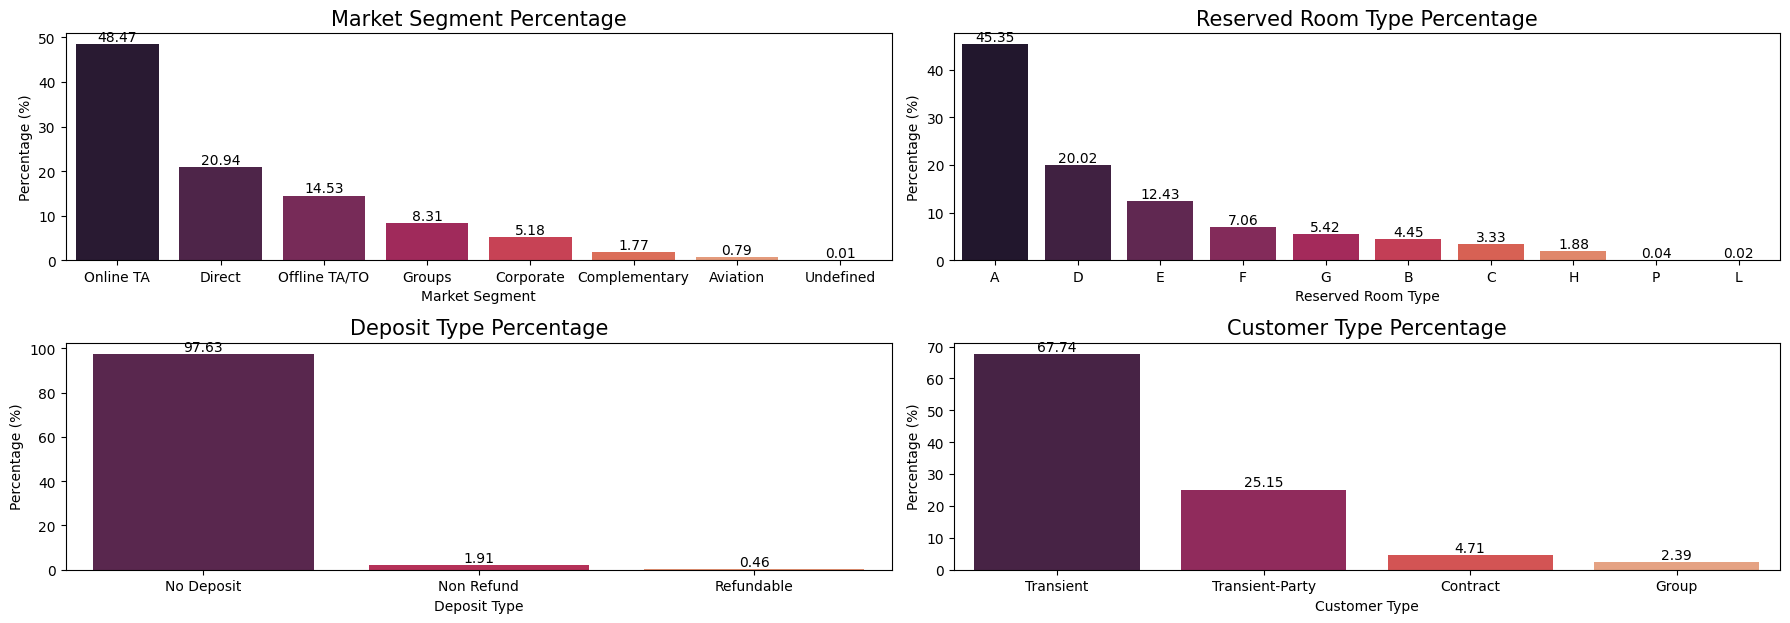

In [ ]:
plt.figure(figsize=(18,9))

plt.subplot(3,2,1)
ax = sns.barplot(x='Market Segment',y='Percentage (%)',data=df_market_segment, palette="rocket")
ax.set_title('Market Segment Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.subplot(3,2,2)
ax = sns.barplot(x='Reserved Room Type',y='Percentage (%)',data=df_reserved_room, palette="rocket")
ax.set_title('Reserved Room Type Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.subplot(3,2,3)
ax = sns.barplot(x='Deposit Type',y='Percentage (%)',data=df_deposit_type, palette="rocket")
ax.set_title('Deposit Type Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.subplot(3,2,4)
ax = sns.barplot(x='Customer Type',y='Percentage (%)',data=df_customer_type, palette="rocket")
ax.set_title('Customer Type Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.tight_layout()
plt.show()

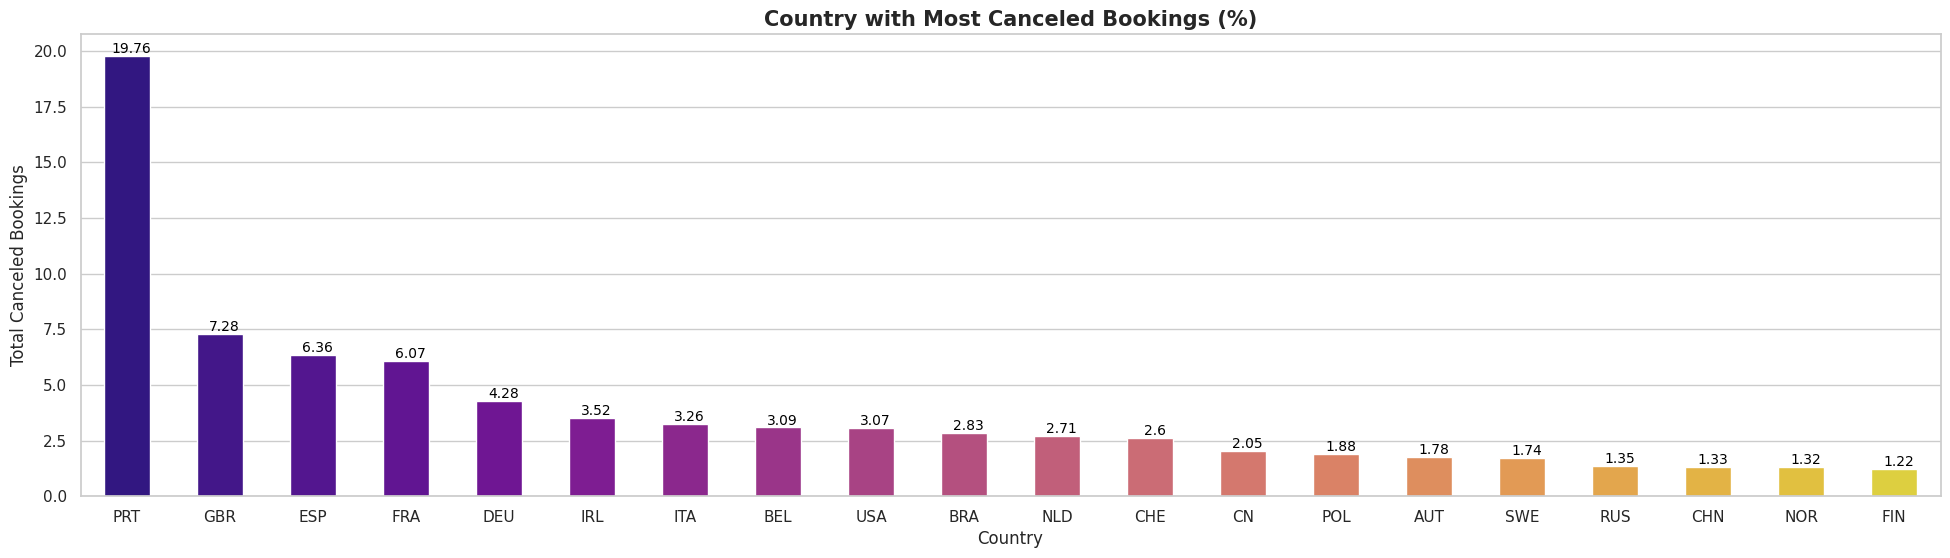

In [ ]:
# Checking Distribution of Country

top_country = df_country.head(20)

plt.figure(figsize=(24,6))
sns.set(style='whitegrid')
ax = sns.barplot(data=top_country, x='Country', y='Percentage (%)', width = 0.5, palette='plasma')
ax.set_title('Country with Most Canceled Bookings (%)', fontsize=15, fontweight='bold')
ax.set_xlabel('Country', fontsize=12, fontweight='medium')
ax.set_ylabel('Total Canceled Bookings', fontsize=12, fontweight='medium')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

Based on the bar charts, here are the simple conclusions for each category:

**Market Segment**  
* Online TA (Travel Agencies): Dominates with nearly 48.47% of the market segment.
* Direct bookings: Account for 20.94%.  
* Offline TA/TO (Travel Agents/Tour Operators): Make up 14.53%.  
* Groups: Constitute 8.31%.  
* Other segments like Corporate, Complementary, Aviation, and Undefined have significantly lower percentages.  

**Reserved Room Type**
* Type A: Most common room type, representing 45.35%.
* Type D: Accounts for 20.02%.
* Type E: Has 12.43%.
* Other room types have much lower percentages, with Type L being the least common at 0.02%.

**Deposit Type**
* No Deposit: The vast majority, with 97.63%.
* Non Refund: Accounts for 1.91%.
* Refundable: Is the least common with only 0.46%.

**Customer Type**
* Transient: The largest category at 67.74%.
* Transient-Party: Represents 25.15%.
* Contract: Accounts for 4.71%.
* Group: The smallest segment with 2.39%.

**Country**
* Portugal has a significantly higher cancellation rate compared to other countries, almost three times higher than the second-ranked United Kingdom. It's reasonable since Portugal is the hotel base.   
* European countries dominate the top positions for cancellation rates, indicating a trend or issue specific to this region.
* The United States and Brazil are the notable non-European countries with higher cancellation percentages.  

Overall, the charts show a heavy reliance on **online travel agencies**, a preference for certain room types (especially **room type A**), a significant majority opting for **no deposit**, and a predominant **transient customer** base.

### <b> 2.2.2. Numerical Features

#### <b> Check Distribution of Data - Statistical Test

In [ ]:
# Select numerical columns
num_columns = dfraw.select_dtypes(include='number').columns.tolist()

# Apply normality tests and calculate skewness and kurtosis
ks_pvalues = [kstest(dfraw[col], 'norm').pvalue for col in num_columns]
shapiro_values = [shapiro(dfraw[col]).pvalue for col in num_columns]
skew_values = [skew(dfraw[col]) for col in num_columns]
kurtosis_values = [kurtosis(dfraw[col]) for col in num_columns]

# Create DataFrame with the results
pd.DataFrame({
    'column': num_columns,
    'skewness': [round(value, 2) for value in skew_values],
    'kurtosis': [round(value, 2) for value in kurtosis_values],
    'ks_pvalue': [round(value, 4) for value in ks_pvalues],
    'sw_pvalue': [round(value, 4) for value in shapiro_values]
})


,column,skewness,kurtosis,ks_pvalue,sw_pvalue
0,previous_cancellations,18.90,448.91,0.0,0.0
1,booking_changes,3.75,30.06,0.0,0.0
2,days_in_waiting_list,8.97,100.97,0.0,0.0
3,required_car_parking_spaces,3.26,32.21,0.0,0.0
4,total_of_special_requests,0.98,0.42,0.0,0.0
5,is_canceled,1.24,-0.46,0.0,0.0


Based on the normality test results and the skewness and kurtosis values, it's clear that none of the numerical features follow a normal distribution (all p-values are 0.0, indicating significant deviations from normality). Additionally, many features exhibit high skewness and kurtosis, suggesting they have extreme values or outliers.

To handle this, we need further analysis and should try some experiments like transformations, binning, robust scaling, or polynomial features.

#### <b> Visualization of Distribution of the Data

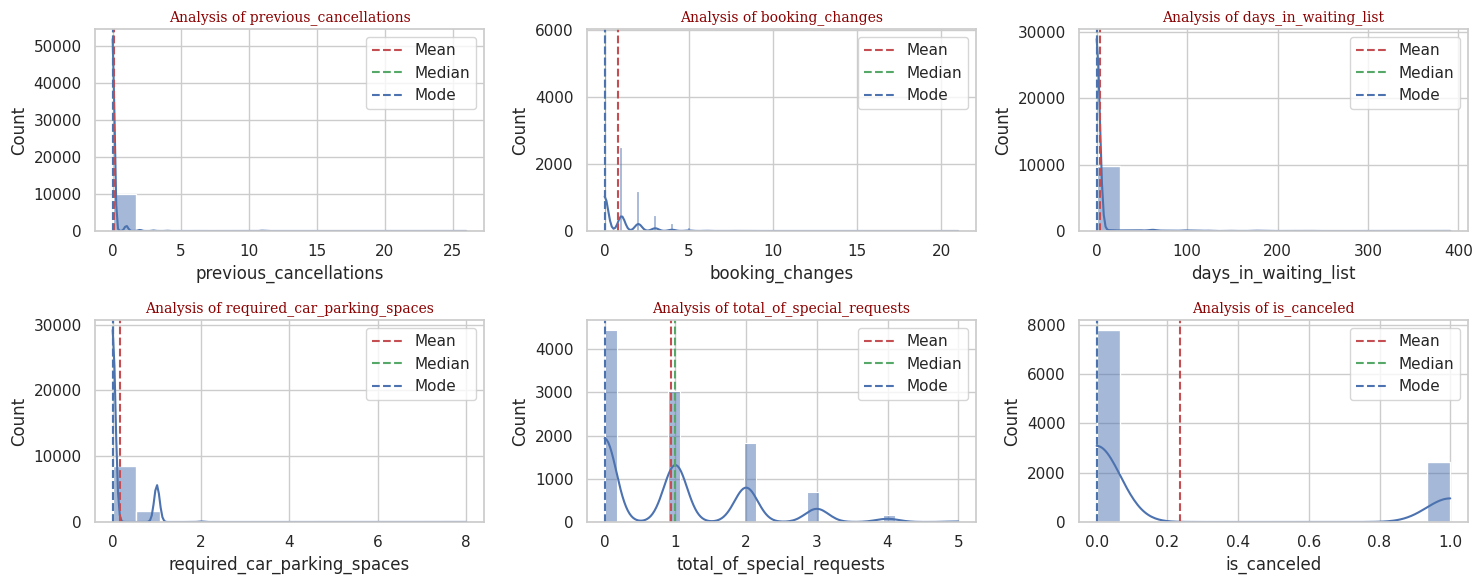

In [ ]:
# Plot Distribution for Numerical

def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,6))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.histplot(data[feature],ax=ax, kde=True)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.tight_layout()
    plt.show()

generate_distribution_plot(dfraw, num_columns)

**Summary :**

* Most of numerical features are most likely categorical since the range is discrete.
* All of the numerical features are right skewed which means each feature has small counts (exclude the label - `is_canceled`). For example, the most frequent of `required_car_parking_spaces` are 0 and 1, the most frequent of `previous_cancellations` are 0 and 1.
* We need to further check for the value count of each features.

#### <b> Visualization of Outliers

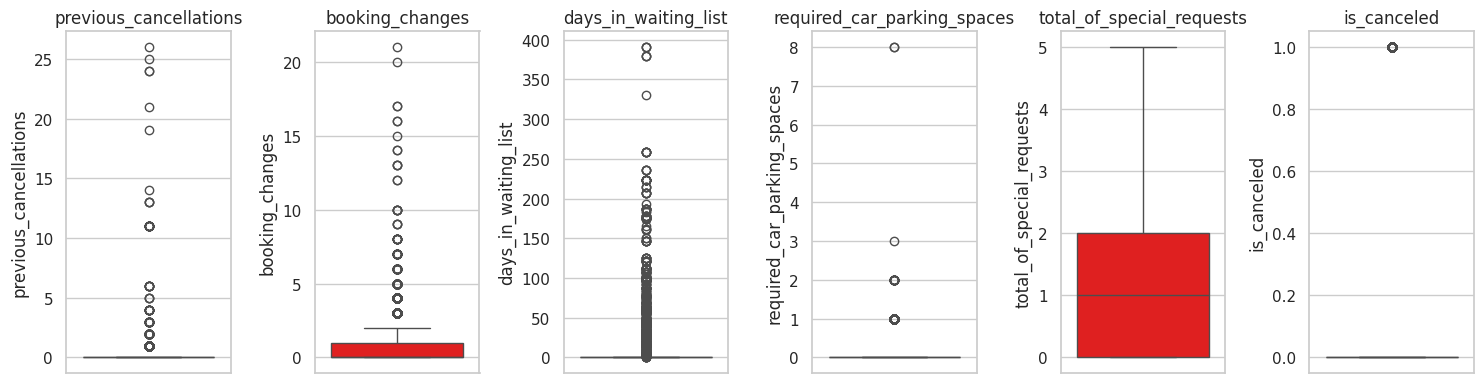

In [ ]:
# Cheking Outliers

plt.figure(figsize=(15, 4))
for i in range(0, len(num_columns)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(dfraw[num_columns[i]], color='red', orient='v')
    plt.title(num_columns[i])
    plt.tight_layout()

**Summary :**

* This plot shows the distribution of data more spesifically where we can see outliers of each feature.  
* We may see that outliers for more than 20 `booking_changes`, more than 300 `days_in_waiting_list`, more than 3 `required_car_parking_spaces`, and so on.

#### <b>Previous Cancellations Analysis

In [ ]:
# Checking unique values in numerical features
dfraw['previous_cancellations'].value_counts()

previous_cancellations
0     9812
1      267
2       53
3       23
11      16
4       11
6        7
13       3
5        3
24       2
25       1
26       1
14       1
19       1
21       1
Name: count, dtype: int64

In [ ]:
dfraw[dfraw['previous_cancellations'] > 11]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
544,PRT,Groups,25,0,Non Refund,0,Transient,A,0,0,1
1618,PRT,Groups,24,0,Non Refund,0,Transient,A,0,0,1
2603,PRT,Offline TA/TO,13,0,No Deposit,31,Transient-Party,A,0,0,1
3279,IRL,Groups,24,0,No Deposit,0,Transient-Party,A,0,0,1
4513,PRT,Offline TA/TO,26,0,Non Refund,0,Transient,A,0,0,1
5267,BEL,Groups,14,0,Non Refund,0,Transient,A,0,0,1
7525,PRT,Offline TA/TO,19,0,Non Refund,0,Transient,A,0,0,1
13984,PRT,Groups,13,0,No Deposit,31,Transient-Party,A,0,0,1
24118,FRA,Direct,13,1,No Deposit,0,Transient,D,0,0,0
65640,PRT,Groups,21,0,No Deposit,0,Transient-Party,A,0,0,1


From the data above, we know that customers who made more than 11 `previous_cancellations` tend to cancel the booking. We may need this data so model know this type of customers and predict more precisely.

#### <b>Required Car Parking Spaces Analysis

In [ ]:
dfraw['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    8535
1    1642
2      22
8       2
3       1
Name: count, dtype: int64

In [ ]:
dfraw[dfraw['required_car_parking_spaces'] > 2]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
21979,AUT,Direct,0,1,No Deposit,122,Transient-Party,E,8,0,0
26977,ESP,Online TA,0,0,No Deposit,0,Transient-Party,A,3,2,0
35802,AUT,Direct,0,1,No Deposit,0,Transient-Party,E,8,1,0


From the data we know that only 3 customers required more than 2 car parking spaces and all of them are Transient-Party customers. But this type of customer kinda make nonsense because we don't have any information of why they need 3 or 8 car parking spaces.

#### <b> Total of Special Requests Analysis

In [ ]:
dfraw['total_of_special_requests'].value_counts()

total_of_special_requests
0    4444
1    3033
2    1829
3     700
4     169
5      27
Name: count, dtype: int64

In [ ]:
dfraw[dfraw['total_of_special_requests'] == 5 ]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
2486,PRT,Online TA,0,2,No Deposit,0,Transient,E,0,5,0
2831,IRL,Offline TA/TO,0,0,No Deposit,0,Transient,A,0,5,0
8952,BEL,Online TA,0,0,No Deposit,0,Contract,A,0,5,0
9038,ISR,Direct,0,1,No Deposit,0,Transient,A,0,5,0
18586,NaN,Direct,0,0,No Deposit,0,Transient,A,0,5,1
20566,GBR,Online TA,0,0,No Deposit,0,Transient,A,0,5,0
23875,NOR,Online TA,0,0,No Deposit,0,Transient-Party,D,0,5,0
28060,ISR,Online TA,0,0,No Deposit,0,Transient,A,0,5,0
28384,ESP,Online TA,0,3,No Deposit,0,Transient,D,1,5,0
35442,DEU,Online TA,0,0,No Deposit,0,Transient-Party,A,0,5,0


From the data above, we know that even though the customers made 5 total special requests, they don't cancel the booking. Because we have enough records (27 rows) to know this pattern, this data may help model to generalize and learn this type of customer.

#### <b>Booking Changes Analysis

In [ ]:
dfraw['booking_changes'].value_counts()

booking_changes
0     5736
1     2473
2     1169
3      452
4      204
5       80
6       34
7       22
8       10
10       5
9        3
13       3
17       2
12       2
14       2
16       2
21       1
20       1
15       1
Name: count, dtype: int64

In [ ]:
dfraw[dfraw['booking_changes'] > 10]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
12621,AUT,Online TA,0,17,No Deposit,0,Transient,A,0,1,0
20247,FRA,Online TA,0,13,No Deposit,0,Transient,E,0,0,0
25029,NLD,Groups,0,12,No Deposit,0,Transient-Party,A,0,0,0
29457,DEU,Corporate,0,14,No Deposit,0,Transient-Party,A,0,1,0
31274,PRT,Corporate,0,21,No Deposit,0,Transient-Party,A,0,0,0
33408,NOR,Online TA,0,14,No Deposit,0,Transient,A,0,2,0
38059,BEL,Groups,0,13,No Deposit,0,Transient-Party,A,0,1,0
44436,GBR,Online TA,0,12,No Deposit,0,Transient,A,0,2,0
45136,NOR,Online TA,0,16,No Deposit,0,Transient,A,0,3,0
51378,IRL,Online TA,0,16,No Deposit,0,Transient,A,0,1,1


From this result, we know that even the customer made more than 10 booking changes, but at the end they didn't cancel the booking. This type of customer may exist in the future so we have to considerate more to remove this data pattern. But, for recommendation, the hotel should have policy of how many changes of customer can be made.

#### <b> Days in Waiting List Analysis

In [ ]:
dfraw[dfraw['days_in_waiting_list'] > 250]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
744,FRA,Groups,0,0,No Deposit,259,Transient-Party,A,0,0,0
5970,PRT,Groups,0,0,Non Refund,391,Transient,A,0,0,1
8063,FRA,Groups,0,1,No Deposit,379,Transient-Party,A,0,1,0
10448,FRA,Groups,0,0,No Deposit,330,Transient-Party,A,0,0,0
11062,PRT,Groups,0,0,No Deposit,379,Transient-Party,A,0,0,1
14748,FRA,Groups,0,0,No Deposit,259,Transient-Party,A,0,1,0
21171,FRA,Groups,0,0,No Deposit,379,Transient-Party,A,0,1,0
45296,FRA,Groups,0,1,No Deposit,259,Transient-Party,A,0,0,0
53796,PRT,Groups,0,0,No Deposit,259,Transient-Party,A,0,1,0
58269,PRT,Groups,0,2,Non Refund,391,Transient,A,0,0,1


From the data above, we can group the customers :
* 259 days in waiting list : All of them are Transient-Party customers who booked room A didn't cancel the booking. (6 customers)
* 330 days in waiting list : One of the Transient-Party customer and didn't cancel the booking (1 customer). This is very unique customer and won't help the model to learn this type of customer because only 1.
* 379 days in waiting list : All of them are Transient-Party customers who booked room A, 2 customers didn't cancel the booking and 1 customer canceled the booking. (3 customers)
* 391 days in waiting list : All of them are Transient customers who booked room A and canceled the booking. (3 customers)  

This absolutely tells us the data pattern and may help the model to be more precise for each pattern.

### <b>2.2.3. Hotel Cancellation Analysis

#### <b>Checking Label Proportion

In [ ]:
dfraw['is_canceled'].value_counts()

is_canceled
0    7788
1    2414
Name: count, dtype: int64

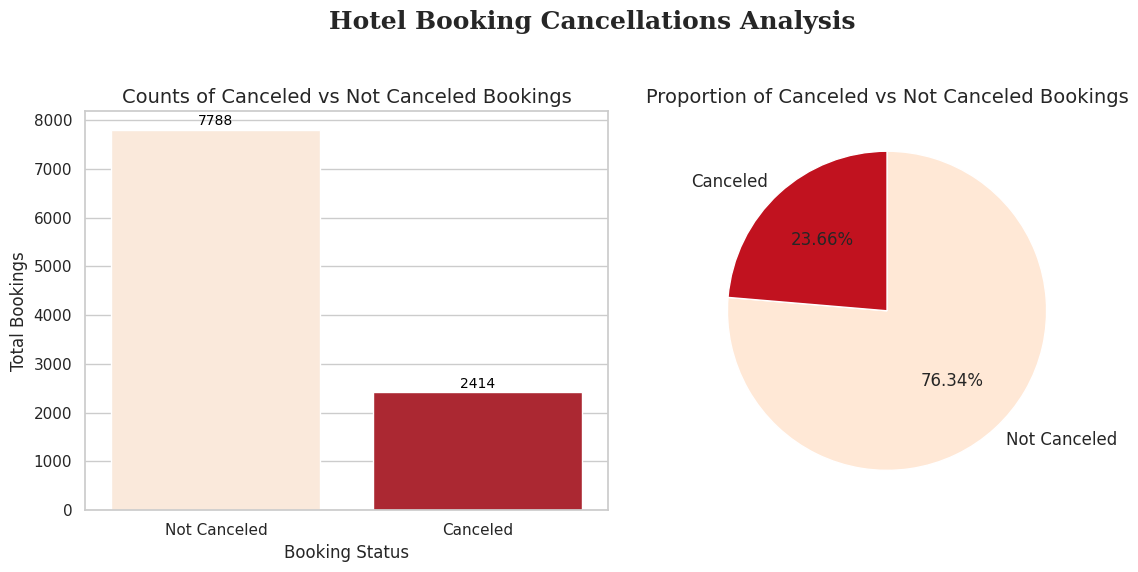

In [ ]:
# Visualization
cancel_counts = dfraw['is_canceled'].value_counts()
cancel_rate = dfraw['is_canceled'].mean()

cancel_df = pd.DataFrame({'Count': cancel_counts, 'Category': ['Not Canceled', 'Canceled']})
cancel_df['Proportion'] = cancel_df['Count'] / cancel_df['Count'].sum()

plt.figure(figsize=(12, 6))

# Bar chart for counts
plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Count', data=cancel_df, palette=['#FFE8D6','#C1121F'])
plt.title('Counts of Canceled vs Not Canceled Bookings', fontsize=14)
plt.ylabel('Total Bookings', fontsize=12)
plt.xlabel('Booking Status', fontsize=12)
for index, value in enumerate(cancel_df['Count']):
    plt.text(index, value + 100, f'{value}', ha='center', fontsize=10, color='black')

# Pie chart for proportions
plt.subplot(1, 2, 2)
plt.pie(cancel_df['Proportion'], labels=cancel_df['Category'], autopct='%1.2f%%', colors=['#FFE8D6','#C1121F'], startangle=90, counterclock=False, textprops={'fontsize': 12})
plt.title('Proportion of Canceled vs Not Canceled Bookings', fontsize=14)

plt.suptitle('Hotel Booking Cancellations Analysis', fontsize=18, fontweight='bold', fontfamily='serif')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Based on the charts, here are the conclusions:**

**Canceled vs Not Canceled Bookings**
* Not Canceled Bookings: 7,788 bookings were not canceled (make up 76.34% of total bookings).
* Canceled Bookings: 2,414 bookings were canceled (constitute 23.66% of total bookings).

**Key Observations**

* The majority of hotel bookings are not canceled, with over three-quarters (76.34%) of the total bookings being successfully confirmed.
* A significant proportion, nearly one-fourth (23.66%), of bookings are canceled, indicating an area for potential improvement to reduce cancellations.
* These insights can be valuable for identifying areas to improve customer retention and decrease the rate of cancellations.

#### <b>Categorical vs Canceled

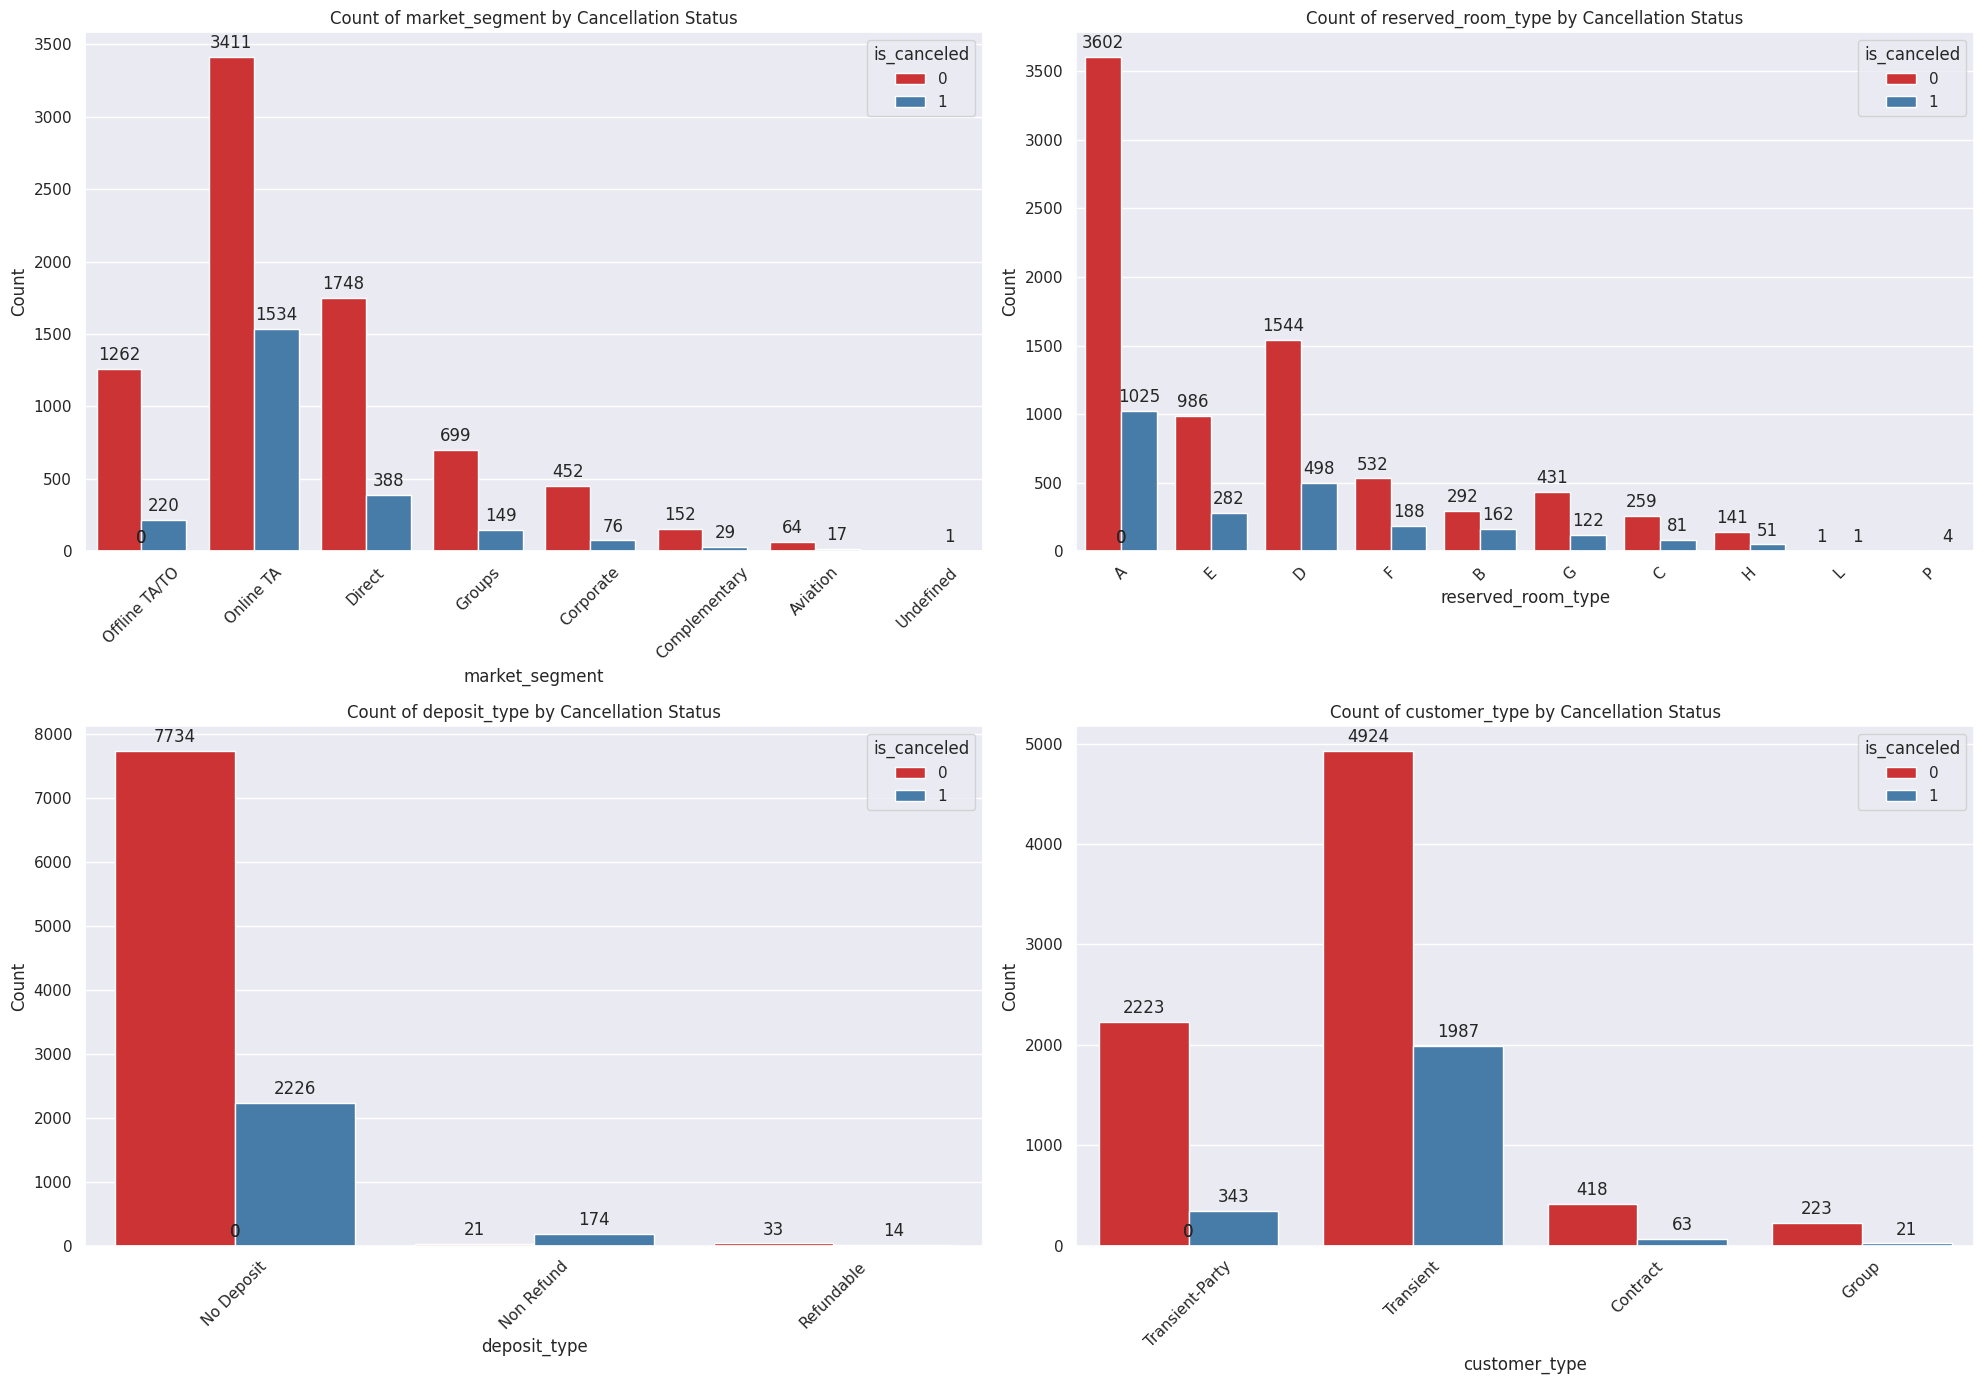

In [ ]:
cat_columns = ['market_segment', 'reserved_room_type', 'deposit_type', 'customer_type']

plt.figure(figsize=(20, 14))
sns.set(palette='Set1')
plotnumber = 1

for feature in cat_columns:
    ax = plt.subplot(2, 2, plotnumber)  # Adjust the layout as needed
    plot = sns.countplot(data=dfraw, x=feature, hue='is_canceled')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature} by Cancellation Status')
    plt.xticks(rotation=45)

    # Adding counts on top of the bars
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')
    plotnumber += 1
    plt.tight_layout()

plt.show()

**Summary :**

* Overall the customers didn't cancel the bookings. But, it's because we have imbalanced dataset where the rate of **non-canceled booking is higher than the canceled bookings**.
* **Online Travel Agencies** (OTA) tend to have a higher cancellation rate compared to other market segments.
* **Direct** bookings are less likely to be canceled.
* **No Deposit** bookings are less likely to be canceled, while **Non Refund** bookings have a higher cancellation rate.
* **Transient** customers are the most common and are less likely to cancel their bookings compared to other customer types.

### <b>2.2.4. Feature Correlation

We visualized the correlations between features using a heatmap. Since the data is not normally distributed, we applied the Spearman method to calculate the correlation coefficients. The Spearman method is a non-parametric measure of rank correlation, which assesses how well the relationship between two variables can be described using a monotonic function. By using this method, we can more accurately capture the relationships between features in our non-normally distributed dataset. This visualization helps us identify the most relevant features for our model and detect any potential multicollinearity issues.

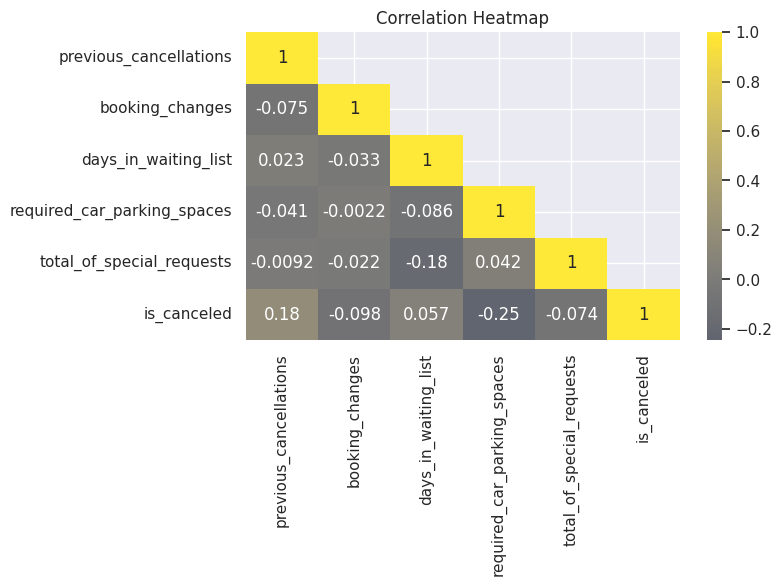

In [ ]:
# Correlation Heatmap
corr_matrix = dfraw[num_columns].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, center=0, cmap='cividis', mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dfraw.loc[:,['country','market_segment','deposit_type','customer_type','reserved_room_type','is_canceled']].phik_matrix(interval_cols=['is_canceled'])\
    .style.background_gradient(cmap='cividis')

,country,market_segment,deposit_type,customer_type,reserved_room_type,is_canceled
country,1.000000,0.307185,0.280722,0.100243,0.000000,0.265065
market_segment,0.307185,1.000000,0.289925,0.514269,0.265603,0.225752
deposit_type,0.280722,0.289925,1.000000,0.065981,0.144352,0.130269
customer_type,0.100243,0.514269,0.065981,1.000000,0.227725,0.260902
reserved_room_type,0.000000,0.265603,0.144352,0.227725,1.000000,0.093993
is_canceled,0.265065,0.225752,0.130269,0.260902,0.093993,1.000000


**Summary :**
From the data above, we separate numerical and categorical features to see the correlation between features because the correlation matrix is ​​only applied to numerical features. To be able to test the correlations among them,  ϕk  (phi k) will be utilized. The highest correlation features to the target (is_canceled) are country and customer type which 0.26.


# <b>3. Data Cleaning and Preparation

In [ ]:
df_clean = dfraw.copy()

## <b>3.1. Impute Missing Values

As we observed in the previous data exploration, the feature that contains null values is `country`. However, due to the very high number of unique values (162 countries) and the imbalance of customers from Portugal compared to other countries, we can consider to fill this with mode (most frequent value).

In [ ]:
# Handle missing values with mode

country_mode = df_clean['country'].mode()[0]
df_clean['country'].fillna(country_mode, inplace=True)
df_clean.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

## <b>3.2. Checking Outliers

In [ ]:
# Checking Outliers

def outlier_del(df, column_index_or_name, method='summary'):
    if isinstance(column_index_or_name, int):
        column_name = df.columns[column_index_or_name]
        column = df.iloc[:, column_index_or_name]
    else:
        column_name = column_index_or_name
        column = df[column_index_or_name]

    if method == 'summary':
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Calculate total outliers and percentage
        outliers = ((column < lower_bound) | (column > upper_bound)).sum()
        total_rows = df.shape[0]
        outlier_percentage = (outliers / total_rows) * 100

        # Print feature name, total outliers, and percentage in one line
        print(f"Feature: {column_name} , Total Outliers: {outliers} , Percentage of Outliers: {outlier_percentage:.2f}%")

        return (lower_bound, upper_bound)
    else:
        return None

In [ ]:
# Check the total outliers
s_num = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces']

for i in range(0, len(s_num)):
    outlier_del(df_clean, s_num[i], 'summary')

Feature: previous_cancellations , Total Outliers: 390 , Percentage of Outliers: 3.82%
Feature: booking_changes , Total Outliers: 824 , Percentage of Outliers: 8.08%
Feature: days_in_waiting_list , Total Outliers: 465 , Percentage of Outliers: 4.56%
Feature: required_car_parking_spaces , Total Outliers: 1667 , Percentage of Outliers: 16.34%


If we use IQR to check the outliers, it seems so many otliers in this dataset. But, if we take a look at previous boxplot, we can see the high number of apparent outliers is also due to the numerical data being categorical in nature. To handle this, we can try several methods during the next preprocessing stage. For now, we don't do anything to these outliers.

In [ ]:
# Remove rows with 'Undefined' in 'market_segment'
df_clean = df_clean[df_clean['market_segment'] != 'Undefined']

## <b>3.3. Feature Selection

### <b>3.1. Permutation Importance

Permutation Importance is a technique used to understand the significance of different features in a machine learning model. It helps in identifying which features contribute the most to the model's predictions. The method involves shuffling the values of each feature and observing the change in the model's performance. A significant drop in performance indicates that the feature is important for the model.

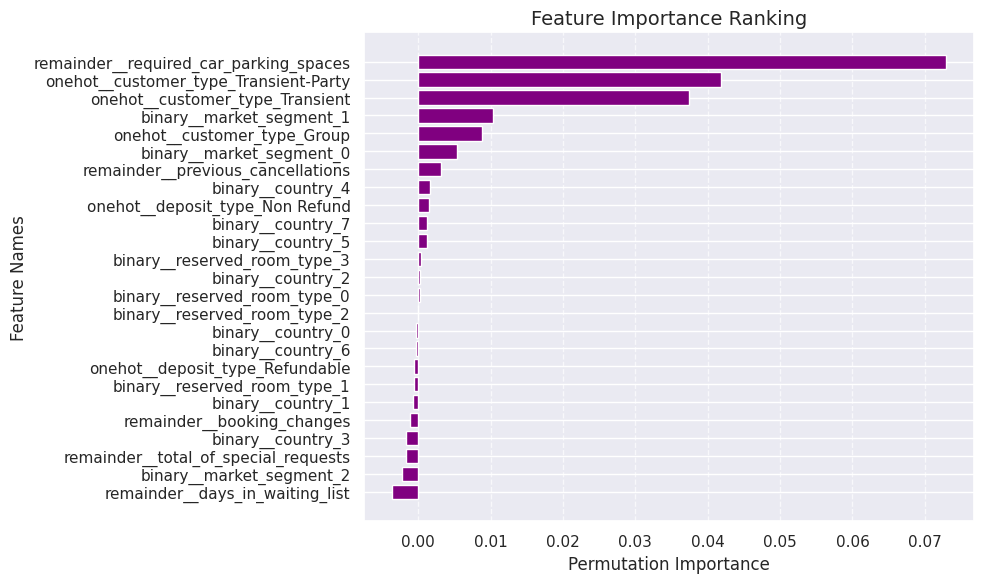

In [ ]:
# One-Hot Encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['country','reserved_room_type', 'market_segment'])
], remainder='passthrough')

# Create the pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

# Split the data
X = df_clean.drop('is_canceled', axis=1)
y = df_clean['is_canceled']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train_fs, y_train_fs)

# Transform the test set
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test_fs)

# Get the model from the pipeline
model = pipeline.named_steps['model']
result = permutation_importance(model, X_test_transformed, y_test_fs, n_repeats=10, random_state=42)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Permutation Importance
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx], color='purple')
plt.xlabel("Permutation Importance", fontsize=12)
plt.ylabel("Feature Names", fontsize=12)
plt.title("Feature Importance Ranking", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Key Insights from Permutation Importance Plot**
* Top Features:   
The most important features in your model are `required_car_parking_spaces`, `customer_type_Transient-Party`, and `customer_type_Transient`. Shuffling these features leads to the largest drop in the model's performance, indicating they are critical for making accurate predictions.
* Moderately Important Features:    
Features like `market_segment_1`, `market_segment_0`, and `previous_cancellations` have moderate importance. They also contribute significantly to the model's predictions but not as much as the top features. Since `deposit_type` Non Refund and Refundable deposit types have moderate importance, it's beneficial to keep them as they provide some predictive power.
* Less Important Features:   
Features at the bottom, such as `days_in_waiting_list`, `market_segment_2`, `total_of_special_requests`, `booking_changes`, some binary of `country` and some binary of `reserved_room_type` have lower importance scores. Shuffling these features does not significantly impact the model's performance, indicating they have less predictive power.
<br>

So, we will combine the result from permutation importance and statistical checking to see the importance and significance of the features.

### <b>3.2. Statistical Checking


**Numerical Features (T-Test)**

In [ ]:
features = ['booking_changes', 'previous_cancellations', 'days_in_waiting_list', 'total_of_special_requests']

# Extract features and target
X_stats = df_clean[features]
y_stats = df_clean['is_canceled']

# Perform t-Test
for feature in features:
    canceled = X_stats[y_stats == 1][feature]
    not_canceled = X_stats[y_stats == 0][feature]

    # Perform t-test
    t_statistic, p_value = ttest_ind(canceled, not_canceled, equal_var=False)  # Assuming unequal variances

    # Print results
    print(f"Feature: {feature}")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")
    if p_value < 0.05:
        print("  Significant difference: Yes")
    else:
        print("  Significant difference: No")
    print("------------------------")

Feature: booking_changes
  T-statistic: -7.9312964666926815
  P-value: 2.7036408349362156e-15
  Significant difference: Yes
------------------------
Feature: previous_cancellations
  T-statistic: 5.357043424599659
  P-value: 9.177606325227338e-08
  Significant difference: Yes
------------------------
Feature: days_in_waiting_list
  T-statistic: 2.922396396221703
  P-value: 0.0034962174390427555
  Significant difference: Yes
------------------------
Feature: total_of_special_requests
  T-statistic: -7.662410549759338
  P-value: 2.2412612069732905e-14
  Significant difference: Yes
------------------------


**Categorical Feature (Chi Square)**

In [ ]:
# Chi Square
categorical_features = ['country', 'market_segment', 'reserved_room_type']
target_variable = 'is_canceled'

# Extract features and target
X_stats_cat = df_clean[categorical_features]
y_stats_cat = df_clean[target_variable]

for feature in categorical_features:
    # Create contingency table (cross-tabulation)
    contingency_table = pd.crosstab(X_stats_cat[feature], y_stats_cat)

    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-Square Test for {feature}:")
    print(f"  Chi-Square Statistic: {chi2}")
    print(f"  P-value: {p_value}")
    if p_value < 0.05:
        print("  Significant association: Yes")
    else:
        print("  Significant association: No")
    print("------------------------")

Chi-Square Test for country:
  Chi-Square Statistic: 582.2268208993324
  P-value: 5.00325253689074e-49
  Significant association: Yes
------------------------
Chi-Square Test for market_segment:
  Chi-Square Statistic: 296.5456606481867
  P-value: 4.496545613886701e-61
  Significant association: Yes
------------------------
Chi-Square Test for reserved_room_type:
  Chi-Square Statistic: 60.99960685597256
  P-value: 8.600211857507451e-10
  Significant association: Yes
------------------------


**Statistical Checking**   
* **T-Tests for Numerical Features**  
  `days_in_waiting_list` feature has the highest p-value among the numerical features tested, suggesting it is relatively less important compared to the others.

* **Chi-Square Tests for Categorical Features**   
  While all categorical features show significant associations with booking cancellations, `reserved_room_type` has the highest p-value among them, indicating it may be relatively less influential compared to `country` and `market_segment`.

**Interpretation**   
* Importance   
Features with lower p-values (closer to zero) are typically considered more important as they show stronger associations or differences in relation to the target variable (cancellation status).
* Least Important   
Based on the provided results, `days in waiting list` among numerical features and `reserved_room_type` among categorical features have relatively higher p-values, suggesting they may have less impact on predicting booking cancellations compared to other features.  
<br>



**Summary for Feature Selection**   
1. Based on the **Permutation Importance**, we know that `days_in_waiting_list`, `binary_market_segment`, and `total_of_special_requests` are the bottom three.
2. From statistical test, we know that `days_in_waiting_list` and `reserved_room_type` are the least importance regarding each feature type.
3. But, if we look at the Permutation Importance, `reserved_room_type` are slightly better than `total_of_special_requests`.
4. `country` has many unique values but less impotance.

SO, for the final decision we would like to drop `days_in_waiting_list`, `total_of_special_requests`, and `country` that have the lowest less impact on prediciting cancellations, and low correlation as well.

**Drop Columns**

In [ ]:
# Drop unimportance features
df_clean.drop(['country','days_in_waiting_list', 'total_of_special_requests'], axis=1, inplace=True)
df_clean.shape

(10201, 8)

In [ ]:
# Drop duplicates after removing some features
df_clean.drop_duplicates(inplace=True)
df_clean.shape

(1247, 8)

### <b>3.3. Label Ambiguity Analysis in Data

Label ambiguity means where the data point cannot be annotated as one of the given labels (occurred 2, with 0 and 1 label). 50% of canceled and 50% of not canceled might be confusing the model to predict.   
Example :   
Feature combination A : [0,0,1,1,0] => 0   
Feature combination B : [1,1,1,1,0] => 1   
Feature combination C : [0,1] => ?  

We'll try to see how the pattern for each features combination and check the label ambiguity to help model generalize the pattern easier.

In [ ]:
def aggregate_labels_indices(group):
    return pd.Series({
        'Instances': len(group),
        'is_canceled': list(group['is_canceled']),
        'Indices': list(group.index)
    })

In [ ]:
# Group by features and aggregate
ambiguous_label = df_clean.groupby(['market_segment', 'previous_cancellations', 'booking_changes',
       'deposit_type', 'customer_type', 'required_car_parking_spaces', 'reserved_room_type']).apply(aggregate_labels_indices)

# Filter groups with different labels
ambiguous_label = ambiguous_label[ambiguous_label['is_canceled'].apply(lambda x: len(set(x)) > 1)]

ambiguous_label.reset_index(inplace=True)
ambiguous_label.head()

,market_segment,previous_cancellations,booking_changes,deposit_type,customer_type,required_car_parking_spaces,reserved_room_type,Instances,is_canceled,Indices
0,Aviation,0,0,No Deposit,Transient,0,A,2,"[0, 1]","[2886, 9113]"
1,Aviation,0,0,No Deposit,Transient,0,D,2,"[0, 1]","[185, 6042]"
2,Aviation,0,0,No Deposit,Transient-Party,0,A,2,"[1, 0]","[18118, 29606]"
3,Aviation,0,0,No Deposit,Transient-Party,0,D,2,"[0, 1]","[27040, 62923]"
4,Aviation,0,1,No Deposit,Transient,0,A,2,"[0, 1]","[7998, 29203]"


In [ ]:
# Analyzing the Instances column

average_instances_per_combination = ambiguous_label['Instances'].mean()
most_common_combination = ambiguous_label['Instances'].max()
least_common_combination = ambiguous_label['Instances'].min()

print("Total Combination", len(ambiguous_label))
print("Average Instances per Combination:", average_instances_per_combination)
print("Total Instances for Common Combination:", most_common_combination)
print("Total Instances for Least Common Combination:", least_common_combination)

Total Combination 251
Average Instances per Combination: 2.0
Total Instances for Common Combination: 2
Total Instances for Least Common Combination: 2


From the analysis result above, we found that there are 251 combination of features that only occurs 2 (0 and 1). This number of ambiguous label really matter for model to differentiate between class (0 and 1). To solve this, because our target is to predict the canceled customers, so we can remove the 0 label of each and remain the label 1. Thus, we can tell the model that those types of customer tend to cancel.

In [ ]:
# Drop the indexes with ambiguous label and keep it to 1

# Iterate through the inconsistent groups and drop label 0 instances from the original dataframe
for _, group in ambiguous_label.iterrows():
    indices_to_drop = group['Indices'][group['is_canceled'] == 0]
    df_clean.drop(index=indices_to_drop, inplace=True)

In [ ]:
df_clean.shape

(996, 8)

**Re-Checking the Proportion of Label**

In [ ]:
# Re-checking label proportion

df_clean['is_canceled'].value_counts()

is_canceled
0    629
1    367
Name: count, dtype: int64

After cleaning and selecting the important features, now we have 4983 rows of data with 9 columns. But, since we have highly imbalanced dataset, even though we have removed the ambiguous label, the proportion of the label still imbalance. Thus, we have to handle the imbalance class using this cleaned data.

## <b>3.4. Data Preparation

In [ ]:
df_pre = df_clean.copy()
df_pre.to_csv('df_pre.csv', index=False)

In [ ]:
df_pre.columns

Index(['market_segment', 'previous_cancellations', 'booking_changes',
       'deposit_type', 'customer_type', 'reserved_room_type',
       'required_car_parking_spaces', 'is_canceled'],
      dtype='object')

**Train-Test Split**

In [ ]:
# Split the data

X = df_pre.drop('is_canceled', axis=1)
y = df_pre['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((796, 7), (200, 7))

In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# <b>4. Modeling

## <b>4.0. Model-Business Explanation

**1. Business Simulation**

* Average Room price: EUR 99 per night (based on [Budget Your Trip](https://www.budgetyourtrip.com/portugal) - average hotel price in Portugal).
* Marketing budget comprised roughly 13.6% of a company’s total budget according to [Deloitte](https://blog.hubspot.com/marketing/marketing-budget-percentage).

* We're predicting booking cancellations to prevent revenue loss (False Negative) plus additional metrics : extra marketing cost (False Positive).

In [ ]:
# Historical data - Without Modeling

print("Historical Total Reservations are: ",len(df_pre))
print("Historical Total Bookings are: ",len(df_pre[df_pre['is_canceled']==0]))
print("Historical Total Cancellations are: ",len(df_pre[df_pre['is_canceled']==1]))
print("Historical Cancellations Rate is: ", round(len(df_pre[df_pre['is_canceled']==1])/len(df_pre)*100,2),"(%)")

Historical Total Reservations are:  996
Historical Total Bookings are:  629
Historical Total Cancellations are:  367
Historical Cancellations Rate is:  36.85 (%)


In [ ]:
# Calculate the financial data

avg_room_price = 99

total_booked = len(df_pre[df_pre['is_canceled']==0])
total_canceled = len(df_pre[df_pre['is_canceled']==1])

revenue_booked = total_booked * avg_room_price
revenue_loss_cancel = total_canceled * avg_room_price

total_revenue = revenue_booked + revenue_loss_cancel

print("Average Room Price is: $", avg_room_price)
print("Total Revenue from Room Booked is: $", revenue_booked)
print("Total Revenue from All Reservation if There's no Cancellation: $", total_revenue)

Average Room Price is: $ 99
Total Revenue from Room Booked is: $ 62271
Total Revenue from All Reservation if There's no Cancellation: $ 98604


**2. Financial Impact**


* **False Positive-FP** (Type I Error):  
The model predicts that a booking will be canceled, but it actually is not canceled. Cost incurred when a room is predicted to be canceled but is not, leading to potential additional marketing cost to re-engage customer (marketing so customer will rebook) after we predict that customer is canceled but actually we don't need marketing budget.

  Potential marketing cost to re-engage each customer that we predict is canceled is **\$13.46** . This comes from :  
  Total Revenue x 13.6%  =   
  USD 62,271 x 13.6% =  USD 8,469 (Total marketing budget)  

  Total marketing budget/Total Booked  =  
  USD8,469 / 629 =  USD 13.46 (Marketing cost to get 1 booking)   

* **True Positive-TP**  
The model predicts that a booking will be canceled and actually canceled. **Marketing Cost $13.46**.

* **True Negative**
The model predicts that the customer will be booked and actually booked. We can **approximate revenue gained** by correctly predicting booked customers.
  
* **False Negative-FN** (Type II Error)   
A booking predicted to not cancel, which actually cancels. This typically results in **revenue loss** because the hotel might not have enough time to rebook the room, which is the same amount of hotel price **\$99**.

**3. Financial Impact Without Modeling:**

* Without any predictive model, we have a historical cancellation rate of 36.85%.

* **Calculation:**

 * **Total booked:** 629.  
 * **Cancellation**
   * 367 cancellations from historical data (36.85%)
   * 200 cancellations from data test => Assume all of them are canceled

 * **Total Loss**
   * **Total Revenue Loss Without Modeling:**  
     200 cancellations * USD 99 = USD 19,800
    * **Total Potental Additional Cost for Marketing:**  
     200 cancellations *  USD 13.46 =  USD 2,692
 * **Total Loss:**   
     USD 19,800 +  USD 2,692 = **\$22,492**
* This calculation have been calculated **without** consideration of any **deposit type**. The assumption if there's no deposit paid.
* This calculation is **the maximum revenue loss we will get** without modelling.

In [ ]:
# Calculate the financial data - calcul

avg_room_price = 99
marketing_cost = 13.46
total_canceled = 200 #from X_test, assume that all of them are cancelled

revenue_loss_cancel = total_canceled * avg_room_price
potential_loss = total_canceled * marketing_cost
total_revenue_loss = revenue_loss_cancel + potential_loss

data = {
    "Metric": ["Average Room Price", "Marketing Cost", "Total Revenue Loss due to Cancellations", "Total Revenue Loss due to Marketing Cost", "Total Loss"
    ],
    "Amount": [avg_room_price, marketing_cost, revenue_loss_cancel, potential_loss, total_revenue_loss
    ]
}

# Create DataFrame
df_finance = pd.DataFrame(data)
df_finance

,Metric,Amount
0,Average Room Price,99.00
1,Marketing Cost,13.46
2,Total Revenue Loss due to Cancellations,19800.00
3,Total Revenue Loss due to Marketing Cost,2692.00
4,Total Loss,22492.00


## <b>4.1. Benchmark Model

### <b>4.1.1. Function for Training (Cross-Validation)

Create a function for training with cross-validation so we can customize the preprocessing using spesific transformer. Since we want to minimize the False Negative, we set the scoring for **Recall**. But, since we want to calculate the revenue loss directly as well, we set an additional metrics called **Revenue Loss**.

In [ ]:
def revenue_loss(y_true, y_pred):
    avg_room_price = 99
    marketing_cost_fp = 13.46
    marketing_cost_tp = 13.46
    # whether they actually cancel or not, we first assume that all of them are cancel

    # Calculate False Negatives (FN) and False Positives (FP)
    FN = sum((y_true == 1) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    TP = sum((y_true == 1) & (y_pred == 1))

    # Calculate revenue loss from FN and marketing cost from FP
    revenue_loss_FN = FN * avg_room_price
    marketing_cost_FP = FP * marketing_cost_fp
    marketing_cost_TP = TP * marketing_cost_tp

    # Total revenue loss
    total_revenue_loss = revenue_loss_FN + marketing_cost_FP + marketing_cost_TP
    return total_revenue_loss

# Create a custom scorer for cross-validation
revenue_loss_scorer = make_scorer(revenue_loss, greater_is_better=False)

In [ ]:
# Custom function to calculate revenue loss for models
def calculate_revenue_loss(models, X_train, y_train, transformer, resampling, tomek, cv=5):
    revenue_loss_results = []

    for name, model in models:
        model_pipeline = ImbPipeline([
            ('Preprocessing', transformer),
            ('SMOTE', resampling),
            ('Tomek', tomek),
            ('Modeling', model)
        ])

        stratified_cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

        # Use cross_val_predict to get predictions for each fold
        y_pred = cross_val_predict(model_pipeline, X_train, y_train, cv=stratified_cv, n_jobs=-1)
        # Calculate revenue loss using predictions
        revenue_loss_value = revenue_loss(y_train, y_pred)
        revenue_loss_results.append((name, revenue_loss_value))

    # Create DataFrame for revenue loss
    revenue_loss_df = pd.DataFrame(revenue_loss_results, columns=['Model', 'Revenue Loss'])
    revenue_loss_df = revenue_loss_df.sort_values(by='Revenue Loss')

    return revenue_loss_df

In [ ]:
def evaluate_models_on_train(models, X_train, y_train, transformer, resampling, tomek):
    results = defaultdict(list)

    for model_name, model in models:
        pipeline = ImbPipeline([
            ('Preprocessing', transformer),
            ('SMOTE', resampling),
            ('Tomek', tomek),
            ('Modeling', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred_train = pipeline.predict(X_train)

        # Compute probabilities for ROC AUC if the model supports it
        if hasattr(model, "predict_proba"):
            y_prob_train = pipeline.predict_proba(X_train)[:, 1]
        else:
            y_prob_train = y_pred_train

        accuracy = accuracy_score(y_train, y_pred_train)
        recall_train = recall_score(y_train, y_pred_train)
        precision = precision_score(y_train, y_pred_train)
        f1score = f1_score(y_train, y_pred_train)
        f2score = fbeta_score(y_train, y_pred_train, beta=2)
        roc_auc = roc_auc_score(y_train, y_prob_train)

        # Cross-validated recall for the training set
        stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=stratified_cv)
        recall_cv = recall_score(y_train, y_pred_cv)

        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Recall (Train)'].append(recall_train)
        results['Recall (CV)'].append(recall_cv)
        results['Precision'].append(precision)
        results['F1 Score'].append(f1score)
        results['F2 Score'].append(f2score)
        results['ROC AUC Score'].append(roc_auc)

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Recall (Train)', ascending=False)

    # Highlight the highest values in each column
    train_df = results_df.style.highlight_max(subset=['Accuracy', 'Recall (Train)', 'Recall (CV)', 'Precision', 'F1 Score', 'F2 Score', 'ROC AUC Score'], color='lightgreen')

    return train_df

### <b>4.1.2. Function For Testing

Create the function to evaluate the model performance for spesific transformer.

In [ ]:
def evaluate_models_on_test(models, X_train, X_test, y_train, y_test, transformer, resampling, tomek):
    results = defaultdict(list)

    for model_name, model in models:
        pipeline = ImbPipeline([
            ('Preprocessing', transformer),
            ('SMOTE', resampling),
            ('Tomek', tomek),
            ('Modeling', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)

        # Compute probabilities for ROC AUC if the model supports it
        if hasattr(model, "predict_proba"):
            y_prob_test = pipeline.predict_proba(X_test)[:, 1]
        else:
            y_prob_test = y_pred_test

        accuracy = accuracy_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        f1score = f1_score(y_test, y_pred_test)
        f2score = fbeta_score(y_test, y_pred_test, beta=2)
        roc_auc = roc_auc_score(y_test, y_prob_test)

        # Standard metrics for train data
        recall_train = recall_score(y_train, y_pred_train)

        # Custom revenue loss metric
        revenue_loss_value = revenue_loss(y_test, y_pred_test)

        # Cross-validated recall for the training set
        stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        y_pred_train_cv = cross_val_predict(pipeline, X_train, y_train, cv=stratified_cv)
        recall_train_cv = recall_score(y_train, y_pred_train_cv)

        # Calculate recall difference
        recall_difference = abs(recall_train_cv - recall_test)

        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Recall'].append(recall_test)
        results['Precision'].append(precision)
        results['F1 Score'].append(f1score)
        results['F2 Score'].append(f2score)
        results['ROC AUC Score'].append(roc_auc)
        results['Recall Difference'].append(recall_difference)
        results['Revenue Loss'].append(revenue_loss_value)

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Revenue Loss')

    # Highlight the highest values in each column
    test_df = results_df.style.highlight_max(subset=['Accuracy', 'Recall', 'Precision', 'F1 Score', 'F2 Score', 'ROC AUC Score'], color='lightgreen')\
                                 .highlight_min(subset=['Revenue Loss'], color='lightgreen')\
                                 .highlight_min(subset=['Recall Difference'], color='lightcoral')

    return test_df

In [ ]:
list_models = [
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

### <b>4.1.3. Handle Imbalance Class

Using both SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links together is a strategy to address imbalances in a dataset effectively. Here's why these two resampling methods are sometimes used in combination:

* **SMOTE (Synthetic Minority Over-sampling Technique)**  
  **Purpose**: SMOTE is used to oversample the minority class by generating synthetic examples rather than by duplicating existing examples. This helps in balancing the class distribution and preventing the model from being biased towards the majority class.

  **How It Works**: SMOTE works by creating synthetic samples from the minority class that are similar to existing samples, thereby increasing the representation of the minority class.

* **Tomek Links**   
  **Purpose**: Tomek links are used to undersample the majority class by identifying pairs of instances (one from each class) that are closest to each other. By removing the majority class instance of each pair, Tomek links aim to increase the margin between classes.

  **How It Works**: Tomek links algorithmically identifies pairs of instances—one from the majority class and one from the minority class—that are closest to each other. It then removes the majority class instance of each pair, which helps in cleaning up the overlap and improving the separation between classes.

**Complementary Effects:**   
SMOTE and Tomek links address different aspects of class imbalance:

* SMOTE focuses on increasing the representation of the minority class.
* Tomek links focus on cleaning up the borderline instances that might cause misclassification.
* Enhanced Performance: Using both methods together can potentially enhance the overall performance of the classifier by balancing the class distribution more effectively and improving the separation between classes.

* Reduction of Overfitting: Tomek links can potentially reduce overfitting that might occur with SMOTE alone by removing noisy or borderline instances from the majority class.

* Improved Generalization: The combination of oversampling (SMOTE) and undersampling (Tomek links) can lead to a better generalization of the model, making it more robust to new, unseen data.

In [ ]:
# Handle Imbalance Class

resampling = SMOTE(sampling_strategy='minority', random_state=42) # oversample the minority class
tomek = TomekLinks(sampling_strategy='majority') # undersample the majority class

### <b>4.1.4. Preprocessing for Base Model

* OneHotEncoder (Deposit Type and Customer Type)
* Binary Encoder (Country and Market Segment)

We use One Hot Encoding and Binary Encoding to encode the categorical data. OHE for categorical features containing less than 5 unique values and Binary for more than 5 unique values. Meanwhile, we let the numerical value as it is.

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type','market_segment'])
], remainder='passthrough')

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['deposit_type', 'customer_type']),
                                ('binary', BinaryEncoder(),
                                 ['reserved_room_type', 'market_segment'])])

## <b>4.3. Train and Test the Base Model

In [ ]:
results_train = evaluate_models_on_train(list_models, X_train, y_train, transformer, resampling, tomek)
print("Training for the Base Model")
results_train

Training for the Base Model


,Model,Accuracy,Recall (Train),Recall (CV),Precision,F1 Score,F2 Score,ROC AUC Score
2,Decision Tree,0.992462,1.000000,0.709898,0.979933,0.989865,0.995921,0.994036
3,Random Forest,0.991206,1.000000,0.774744,0.976667,0.988196,0.995245,0.997540
5,Naive Bayes,0.679648,0.993174,0.955631,0.534926,0.695341,0.847902,0.839227
4,XGBoost,0.972362,0.979522,0.744027,0.947195,0.963087,0.972881,0.995294
0,KNN,0.869347,0.928328,0.805461,0.766197,0.839506,0.890635,0.948151
7,Gradient Boosting,0.853015,0.894198,0.805461,0.752874,0.817473,0.861842,0.942468
1,Logistic Regression,0.762563,0.856655,0.877133,0.630653,0.726483,0.799363,0.864757
6,AdaBoost,0.793970,0.825939,0.795222,0.681690,0.746914,0.792403,0.887620


In [ ]:
# Evaluate on the test set
results_test_1 = evaluate_models_on_test(list_models, X_train, X_test, y_train, y_test, transformer, resampling, tomek)
print("Testing for the Base Model")
results_test_1

Testing for the Base Model


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score,Recall Difference,Revenue Loss
1,Logistic Regression,0.785000,0.959459,0.639640,0.767568,0.872236,0.853389,0.082326,1791.060000
5,Naive Bayes,0.660000,1.000000,0.521127,0.685185,0.844749,0.815637,0.044369,1911.320000
3,Random Forest,0.790000,0.810811,0.681818,0.740741,0.781250,0.888782,0.036067,2570.480000
7,Gradient Boosting,0.785000,0.797297,0.678161,0.732919,0.770235,0.898863,0.008163,2656.020000
6,AdaBoost,0.755000,0.810811,0.631579,0.710059,0.767263,0.860146,0.015589,2664.700000
0,KNN,0.735000,0.770270,0.612903,0.682635,0.732648,0.802874,0.035190,2934.780000
4,XGBoost,0.760000,0.689189,0.671053,0.680000,0.685484,0.866366,0.054838,3299.960000
2,Decision Tree,0.695000,0.689189,0.573034,0.625767,0.662338,0.693801,0.020708,3474.940000


**Summary**

From the training and testing results for the base model, it appears that Logistic Regression is the best model, achieving the smallest Revenue Loss of $1791 with a Recall of 0.95. The second-best model is Naive Bayes with a Revenue Loss of \$1911 and a Recall of 1. Meanwhile, other models such as KNN, Random Forest, and XGBoost experienced overfitting.

### <b>4.3.1. First Experiment  


**Preprocessing** :
* Robust Scaler

<b>Explanation</b>
- The first-two steps in the transformer adopt the same encoding techniques as to those in base model preprocessing.
- <b>Robust scaling</b>: Robust scaling is a data preprocessing technique used to normalize data, especially in cases where the data contains outliers. Unlike standard scaling methods such as z-score normalization (which uses the mean and standard deviation), robust scaling uses statistics that are less sensitive to outliers: the median and the interquartile range (IQR). This makes robust scaling particularly effective for datasets with outliers or skewed distributions.<br>   
 Each feature value is transformed by subtracting the median and then dividing by the IQR $$X_{\text{scaled}}=\frac{X-\text{median}(X)}{IQR(X)}$$
    <br>

This transformation was chosen because several numerical features contain outliers (`previous_cancellations`, `booking_changes`, `required_car_parking_spaces`).

In [ ]:
transformer1 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type' ,'market_segment']),
    ('scaler', RobustScaler(), ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces'])
], remainder='passthrough')

In [ ]:
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['deposit_type', 'customer_type']),
                                ('binary', BinaryEncoder(),
                                 ['reserved_room_type', 'market_segment']),
                                ('scaler', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'required_car_parking_spaces'])])

In [ ]:
# Train using cross-validation
results_train_1 = evaluate_models_on_train(list_models, X_train, y_train, transformer1, resampling, tomek)
print("Training for the First Experiment - Scaler")
results_train_1

Training for the First Experiment - Scaler


,Model,Accuracy,Recall (Train),Recall (CV),Precision,F1 Score,F2 Score,ROC AUC Score
2,Decision Tree,0.973618,1.000000,0.730375,0.933121,0.965404,0.985868,0.979125
3,Random Forest,0.971106,1.000000,0.784983,0.927215,0.962233,0.984543,0.996129
5,Naive Bayes,0.677136,0.993174,0.945392,0.532967,0.693683,0.846915,0.840829
4,XGBoost,0.961055,0.989761,0.754266,0.911950,0.949264,0.973154,0.991956
0,KNN,0.860553,0.941980,0.829352,0.745946,0.832579,0.894942,0.957148
7,Gradient Boosting,0.835427,0.887372,0.815700,0.726257,0.798771,0.849673,0.935798
1,Logistic Regression,0.755025,0.860068,0.880546,0.620690,0.721030,0.798479,0.865842
6,AdaBoost,0.792714,0.832765,0.795222,0.677778,0.747320,0.796345,0.883783


In [ ]:
# Evaluate on the test set
results_test_1 = evaluate_models_on_test(list_models, X_train, X_test, y_train, y_test, transformer1, resampling, tomek)
print("Testing for the First Experiment - Scaler")
results_test_1

Testing for the First Experiment - Scaler


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score,Recall Difference,Revenue Loss
1,Logistic Regression,0.780000,0.959459,0.633929,0.763441,0.870098,0.856607,0.078913,1804.520000
5,Naive Bayes,0.660000,1.000000,0.521127,0.685185,0.844749,0.821965,0.054608,1911.320000
3,Random Forest,0.800000,0.878378,0.677083,0.764706,0.829082,0.888085,0.093395,2183.160000
7,Gradient Boosting,0.795000,0.878378,0.670103,0.760234,0.826972,0.885135,0.062679,2196.620000
6,AdaBoost,0.790000,0.864865,0.666667,0.752941,0.816327,0.849045,0.069643,2282.160000
0,KNN,0.735000,0.851351,0.600000,0.703911,0.785536,0.828185,0.022000,2502.300000
4,XGBoost,0.785000,0.756757,0.691358,0.722581,0.742706,0.863900,0.002491,2872.260000
2,Decision Tree,0.700000,0.662162,0.583333,0.620253,0.644737,0.692192,0.068213,3605.640000



From the experiment results using Robust Scaler to handle outliers, it is evident that the best model is still Logistic Regression with a Revenue Loss of $1804.52 and a Recall of 0.95, with a higher test level than training. As with the base model, some models experienced overfitting.

### <b>4.3.2. Second Experiment
Preprocessing :
* Polynomial Features (Previous Cancellation, Booking Changes, Required Car Parking Spaces)

Polynomial features refer to the process of creating new features by raising existing features to various powers, allowing the model to capture more complex relationships in the data.
Feature Transformation:

For a given feature
𝑥
x, polynomial features of degree
𝑑
d will generate new features
𝑥
2
,
𝑥
3
,
…
,
𝑥
𝑑
x
2
 ,x
3
 ,…,x
d
 .
For a dataset with multiple features, the transformation considers interactions between features as well, such as
𝑥
1
×
𝑥
2
x
1
​
 ×x
2
​
 ,
𝑥
1
2
×
𝑥
2
x
1
2
​
 ×x
2
​
 , etc.

In [ ]:
transformer2 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type','market_segment']),
    ('poly', PolynomialFeatures(degree=2 ,include_bias=False), ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces'])
], remainder='passthrough')

In [ ]:
transformer2

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['deposit_type', 'customer_type']),
                                ('binary', BinaryEncoder(),
                                 ['reserved_room_type', 'market_segment']),
                                ('poly', PolynomialFeatures(include_bias=False),
                                 ['previous_cancellations', 'booking_changes',
                                  'required_car_parking_spaces'])])

In [ ]:
# Train using cross-validation
results_train_2 = evaluate_models_on_train(list_models, X_train, y_train, transformer2, resampling, tomek)
print("Training for the Second Experiment - Polynomial Features")
results_train_2

Training for the Second Experiment - Polynomial Features


,Model,Accuracy,Recall (Train),Recall (CV),Precision,F1 Score,F2 Score,ROC AUC Score
2,Decision Tree,0.991206,1.000000,0.730375,0.976667,0.988196,0.995245,0.993042
3,Random Forest,0.987437,1.000000,0.825939,0.966997,0.983221,0.993220,0.996553
5,Naive Bayes,0.677136,0.993174,0.993174,0.532967,0.693683,0.846915,0.841246
4,XGBoost,0.974874,0.986348,0.754266,0.947541,0.966555,0.978334,0.990755
0,KNN,0.844221,0.928328,0.829352,0.725333,0.814371,0.879121,0.942594
7,Gradient Boosting,0.854271,0.880546,0.788396,0.761062,0.816456,0.853739,0.939944
1,Logistic Regression,0.761307,0.849829,0.856655,0.630380,0.723837,0.794512,0.867973
6,AdaBoost,0.792714,0.812287,0.788396,0.683908,0.742590,0.782895,0.886229


In [ ]:
# Evaluate on the test set
results_test_2 = evaluate_models_on_test(list_models, X_train, X_test, y_train, y_test, transformer2, resampling, tomek)
print("Testing for the Second Experiment - Polynomial Features")
results_test_2

Testing for the Second Experiment - Polynomial Features


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score,Recall Difference,Revenue Loss
1,Logistic Regression,0.775000,0.959459,0.628319,0.759358,0.867971,0.864543,0.102804,1817.980000
5,Naive Bayes,0.660000,1.000000,0.521127,0.685185,0.844749,0.827542,0.006826,1911.320000
3,Random Forest,0.830000,0.851351,0.732558,0.787500,0.824607,0.883741,0.025413,2246.560000
6,AdaBoost,0.770000,0.824324,0.648936,0.726190,0.782051,0.855373,0.035928,2552.240000
7,Gradient Boosting,0.780000,0.783784,0.674419,0.725000,0.759162,0.884813,0.004612,2741.560000
2,Decision Tree,0.750000,0.797297,0.627660,0.702381,0.756410,0.759760,0.066922,2750.240000
4,XGBoost,0.790000,0.756757,0.700000,0.727273,0.744681,0.878057,0.002491,2858.800000
0,KNN,0.710000,0.783784,0.580000,0.666667,0.732323,0.791506,0.045568,2930.000000



From the experiment results using Polynomial Features, Logistic Regression still shows the best performance with a Revenue Loss of $1817.98 and a Recall of 0.95. Naive Bayes also demonstrates good and stable performance, consistently being the second-best model.

### <b>4.3.3 Third Experiment
Preprocessing :
* Robust Scaler
* Polynomial Features

In [ ]:
transformer3 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type', 'market_segment']),
    ('scaler', RobustScaler(), ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces']),
    ('poly', PolynomialFeatures(degree=3), ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces'])
], remainder='passthrough')

In [ ]:
transformer3

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['deposit_type', 'customer_type']),
                                ('binary', BinaryEncoder(),
                                 ['reserved_room_type', 'market_segment']),
                                ('scaler', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'required_car_parking_spaces']),
                                ('poly', PolynomialFeatures(degree=3),
                                 ['previous_cancellations', 'booking_changes',
                                  'required_car_parking_spaces'])])

In [ ]:
# Train using cross-validation
results_train_3 = evaluate_models_on_train(list_models, X_train, y_train, transformer3, resampling, tomek)
print("Training for the Third Experiment - Scaler and Polynomial Features")
results_train_3

Training for the Third Experiment - Scaler and Polynomial Features


,Model,Accuracy,Recall (Train),Recall (CV),Precision,F1 Score,F2 Score,ROC AUC Score
2,Decision Tree,0.988693,1.000000,0.703072,0.970199,0.984874,0.993894,0.991054
3,Random Forest,0.986181,1.000000,0.805461,0.963816,0.981575,0.992547,0.995261
5,Naive Bayes,0.677136,0.989761,0.989761,0.533088,0.692951,0.844988,0.765204
4,XGBoost,0.966080,0.979522,0.784983,0.931818,0.955075,0.969595,0.988516
0,KNN,0.846734,0.931741,0.839590,0.728000,0.817365,0.882353,0.942346
7,Gradient Boosting,0.846734,0.890785,0.802048,0.743590,0.810559,0.856861,0.937057
1,Logistic Regression,0.768844,0.877133,0.832765,0.634568,0.736390,0.814838,0.874704
6,AdaBoost,0.795226,0.822526,0.798635,0.684659,0.747287,0.790682,0.888637


In [ ]:
# Evaluate on the test set
results_test_3 = evaluate_models_on_test(list_models, X_train, X_test, y_train, y_test, transformer3, resampling, tomek)
print("Testing for the third Experiment - Scaler and Polynomial Features")
results_test_3

Testing for the third Experiment - Scaler and Polynomial Features


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score,Recall Difference,Revenue Loss
5,Naive Bayes,0.670000,1.000000,0.528571,0.691589,0.848624,0.777778,0.010239,1884.400000
1,Logistic Regression,0.765000,0.891892,0.628571,0.737430,0.822943,0.859610,0.059127,2205.300000
6,AdaBoost,0.775000,0.824324,0.655914,0.730539,0.784062,0.852531,0.025690,2538.780000
7,Gradient Boosting,0.790000,0.810811,0.681818,0.740741,0.781250,0.890069,0.008763,2570.480000
0,KNN,0.725000,0.810811,0.594059,0.685714,0.755668,0.786894,0.028780,2745.460000
2,Decision Tree,0.745000,0.797297,0.621053,0.698225,0.754476,0.755792,0.094226,2763.700000
3,Random Forest,0.790000,0.770270,0.695122,0.730769,0.753968,0.862988,0.035190,2786.720000
4,XGBoost,0.795000,0.743243,0.714286,0.728477,0.737265,0.884599,0.041740,2917.420000



The third experiment combined Robust Scaling and Polynomial Features. It shows that the best model is Naive Bayes; however, the resulting Revenue Loss is the highest among all the experiments, even though the Recall is 1. This demonstrates that while the model performs very well in preventing revenue loss due to cancellations, it struggles to minimize marketing costs.

From the three experiments, we found that the best model to reduce revenue is **Logistic Regression**. Since we don't set any parameter, we have to perform Hyperparameter Tuning to ensure the algorithm works at its best.

## <b>4.4. Hyperparameter Tuning

### <b>4.4.1. Hyperparameter Tuning for Logistic Regression

In [ ]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'Modeling__C': [1000, 500, 100, 50, 10, 5, 1, 0.1, 0.5],
    'Modeling__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'Modeling__class_weight': ['balanced', None],
    'Modeling__penalty': ['l2', None],
    'Modeling__max_iter': [1000, 500, 100]
}

# Create the pipeline
model_pipeline = ImbPipeline([
    ('Preprocessing', transformer),
    ('SMOTE', resampling),
    ('Tomek', tomek),
    ('Modeling', LogisticRegression(random_state=42))
])

# Define GridSearchCV with multiple scoring
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring={'recall': 'recall', 'revenue_loss': revenue_loss_scorer}, refit='recall')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
y_pred_tuned_logreg = best_model.predict(X_test)

# Evaluate the performance
accuracy_tuned_logreg = accuracy_score(y_test, y_pred_tuned_logreg)
precision_tuned_logreg = precision_score(y_test, y_pred_tuned_logreg)
recall_tuned_logreg = recall_score(y_test, y_pred_tuned_logreg)
f1_score_tuned_logreg = f1_score(y_test, y_pred_tuned_logreg)
f2_score_tuned_logreg = fbeta_score(y_test, y_pred_tuned_logreg, beta=2)
roc_auc_tuned_logreg = roc_auc_score(y_test, y_pred_tuned_logreg)
revenue_loss_tuned_logreg = revenue_loss(y_test, y_pred_tuned_logreg)

# Extract the best recall score and its parameters
best_recall_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Parameters : ", best_params)
print("Accuracy on Tuned Logreg: ", accuracy_tuned_logreg)
print("Precision on Tuned Logreg: ", precision_tuned_logreg)
print("Best Cross-Validated Recall: ", best_recall_score)
print("Recall Score on Tuned Logreg: ", recall_tuned_logreg)
print("F1 Score on Tuned Logrger: ", f1_score_tuned_logreg)
print("F2 Score on Tuned Logreg: ", f2_score_tuned_logreg)
print("ROC AUC Score on Tuned Logreg: ", roc_auc_tuned_logreg)
print("Revenue Loss on Tuned Logreg: ", revenue_loss_tuned_logreg)

Best Parameters :  {'Modeling__C': 0.1, 'Modeling__class_weight': None, 'Modeling__max_iter': 1000, 'Modeling__penalty': 'l2', 'Modeling__solver': 'liblinear'}
Accuracy on Tuned Logreg:  0.785
Precision on Tuned Logreg:  0.6371681415929203
Best Cross-Validated Recall:  0.8805961426066627
Recall Score on Tuned Logreg:  0.972972972972973
F1 Score on Tuned Logrger:  0.7700534759358288
F2 Score on Tuned Logreg:  0.880195599022005
ROC AUC Score on Tuned Logreg:  0.8237880737880738
Revenue Loss on Tuned Logreg:  1718.98


In [ ]:
# Print the classification report
print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_tuned_logreg))


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.67      0.80       126
           1       0.64      0.97      0.77        74

    accuracy                           0.79       200
   macro avg       0.81      0.82      0.78       200
weighted avg       0.85      0.79      0.79       200



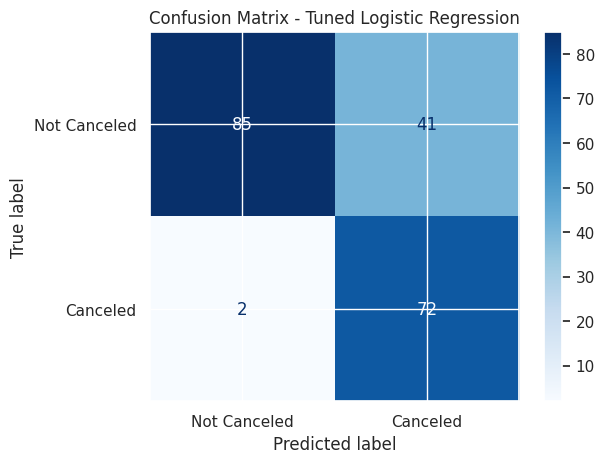

In [ ]:
cm = confusion_matrix(y_test, y_pred_tuned_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()

### 4.4.2. Before and After Modeling Hyperparameter Tuning

**Before and After Hyperparameter Tuning Logistic Regression**
________________

|  | Accuracy | Precision | Recall | F1 Score |F2 Score|ROC AUC|Revenue Loss|
| --- | --- | --- | --- | --- | --- | --- | --- |
| Before | 0.79 | 0.64 | 0.96 | 0.77 | 0.87 | 0.85 | 1791.06
| After | 0.79 | 0.64 | 0.97 | 0.77 | 0.88 | 0.82 | 1718.98 |

We can see that hyperparameter tuning give a better result since our model already perform well. Recall, F2, and Revenue Loss are increased from the previous model performance. Thus, we choose the Tuned Logistic Regression model for our final model.


# <b> 5. Model Finalization and Explanation

## <b>5.1. Final Model - Logistic Regression

In [ ]:
# Create a pipeline with transformer and Tuned Logistic Regression
logreg_model = ImbPipeline([
    ('Preprocessing', transformer),
    ('SMOTE', SMOTE(random_state=42, sampling_strategy='minority')),
    ('Tomek', TomekLinks(sampling_strategy='majority')),
    ('Modeling', LogisticRegression(random_state=42, C = 0.1, max_iter=1000, penalty='l2', solver='liblinear'))
])
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the performance
accuracy_lr = accuracy_score(y_test, y_pred_logreg)
recall_lr = recall_score(y_test, y_pred_logreg)
precision_lr = precision_score(y_test, y_pred_logreg)
f1_score_lr = f1_score(y_test, y_pred_logreg)
f2_score_lr = fbeta_score(y_test, y_pred_logreg, beta=2)
roc_auc_lr = roc_auc_score(y_test, y_pred_logreg)
revenue_loss_lr = revenue_loss(y_test, y_pred_logreg)

print("Evaluation Metrics for Logistic Regression")
eval_logreg = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score", "F2 Score", "ROC AUC Score", "Revenue Loss"],
    "Value": [accuracy_lr, recall_lr, precision_lr, f1_score_lr, f2_score_lr, roc_auc_lr, revenue_loss_lr]
}

# Create DataFrame
df_logreg = pd.DataFrame(eval_logreg)
df_logreg

Evaluation Metrics for Logistic Regression


,Metric,Value
0,Accuracy,0.785000
1,Recall,0.972973
2,Precision,0.637168
3,F1 Score,0.770053
4,F2 Score,0.880196
5,ROC AUC Score,0.823788
6,Revenue Loss,1718.980000


In [ ]:
# Print the classification report

print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_logreg))


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.67      0.80       126
           1       0.64      0.97      0.77        74

    accuracy                           0.79       200
   macro avg       0.81      0.82      0.78       200
weighted avg       0.85      0.79      0.79       200



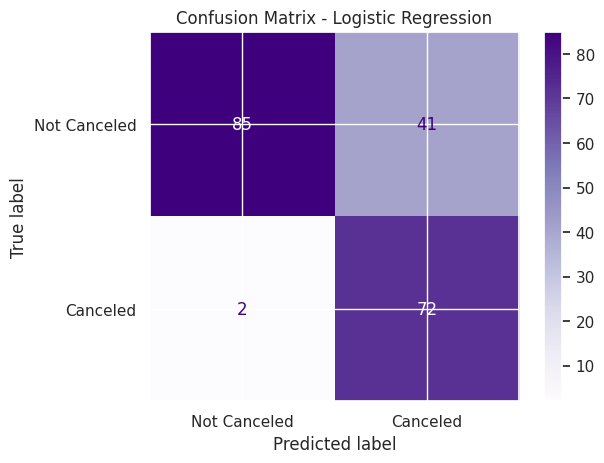

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# Save the model
joblib.dump(logreg_model, 'logreg_model.pkl')

['logreg_model.pkl']

## <b>5.2. How Logistic Regression Works

Logistic Regression operates using the Sigmoid Function by incorporating the values from all the features used to construct the model. For categorical variables, they are encoded as 1 or 0 before being inputted. The model then outputs a value ranging from 0 to 1 (probability), which represents the likelihood of a customer canceling an order or not.

In [ ]:
# Extract the intercept (beta 0) and coefficients (beta x)
logreg = logreg_model.named_steps['Modeling']
beta_0 = logreg.intercept_[0]
beta_x = logreg.coef_[0]

# Print the results
print(f"Intercept (Beta 0): {beta_0}")
for i, coef in enumerate(beta_x):
    # Make sure we don't go out of bounds for X.columns
    if i < len(X.columns):
        feature_name = X.columns[i]  # Get the feature name at index i
        print(f"Coefficient for feature {feature_name} (Beta {i+1}): {coef}")
    else:
        print(f"Coefficient (Beta {i+1}): {coef} - The Feature X Has Been Transformed ")

Intercept (Beta 0): 0.2316027769244871
Coefficient for feature market_segment (Beta 1): 0.5902021961238871
Coefficient for feature previous_cancellations (Beta 2): -0.16823287685124846
Coefficient for feature booking_changes (Beta 3): -0.4824925896358426
Coefficient for feature deposit_type (Beta 4): 0.45895658624718033
Coefficient for feature customer_type (Beta 5): 0.07409235586740862
Coefficient for feature reserved_room_type (Beta 6): 0.154648236414671
Coefficient for feature required_car_parking_spaces (Beta 7): -0.30301632401886275
Coefficient (Beta 8): -0.09535695315335384 - The Feature X Has Been Transformed 
Coefficient (Beta 9): 0.2398622730815006 - The Feature X Has Been Transformed 
Coefficient (Beta 10): 0.31191614397804884 - The Feature X Has Been Transformed 
Coefficient (Beta 11): -0.2832728247303068 - The Feature X Has Been Transformed 
Coefficient (Beta 12): 0.6857820073523201 - The Feature X Has Been Transformed 
Coefficient (Beta 13): 0.041926932160254546 - The Feat

Interpretation of Coefficients and Intercept:  
* Intercept (β₀ = 0.2316):  

  This is the base log-odds of the dependent variable (booking being canceled) when all independent variables are equal to zero. This value indicates the log-odds of cancellation for a hypothetical booking where all feature values are zero.

* market_segment (β₁ = 0.5902):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in market_segment, holding all other variables constant. A positive coefficient indicates that as the market_segment value increases, the odds of a booking being canceled increase.

* previous_cancellations (β₂ = -0.1682):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in previous_cancellations, holding all other variables constant. A negative coefficient indicates that as the number of previous cancellations increases, the odds of a booking being canceled decrease.

* booking_changes (β₃ = -0.4825):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in booking_changes, holding all other variables constant. A negative coefficient indicates that as the number of booking changes increases, the odds of a booking being canceled decrease.

* deposit_type (β₄ = 0.4590):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in deposit_type, holding all other variables constant. A positive coefficient indicates that as the deposit type value increases, the odds of a booking being canceled increase.

* customer_type (β₅ = 0.0741):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in customer_type, holding all other variables constant. A positive coefficient indicates that as the customer type value increases, the odds of a booking being canceled increase.

* reserved_room_type (β₆ = 0.1546):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in reserved_room_type, holding all other variables constant. A positive coefficient indicates that as the reserved room type value increases, the odds of a booking being canceled increase.

* required_car_parking_spaces (β₇ = -0.3030):

  This coefficient represents the change in the log-odds of a booking being canceled for a one-unit increase in required_car_parking_spaces, holding all other variables constant. A negative coefficient indicates that as the number of required car parking spaces increases, the odds of a booking being canceled decrease.

Let's use some hypothetical feature values to calculate the predicted probability of a booking cancellation. Assume:

market_segment = 1 (Direct)
previous_cancellations = 2
booking_changes = 0
deposit_type = 1 (Non Refundt)
customer_type = 0 (Transient)
reserved_room_type = 2 (E)
required_car_parking_spaces = 1

Calculate the linear combination (z):   
z = 0.2316 + 0.5902*1 − 0.1682*2 − 0.4825*0 + 0.4590*1 + 0.0741*0 + 0.1546*2 − 0.3030*1   
z = 0.2316+0.5902−0.3364+0+0.4590+0+0.3092−0.3030z = 0.2316 + 0.5902 - 0.3364 + 0 + 0.4590 + 0 + 0.3092 - 0.3030 z = 0.2316 + 0.5902− 0.3364+0+0.4590+0+0.3092−0.3030  
z = 0.9506  

Now, calculate the probability 𝑝:  
𝑝 ≈ 1/1+0.3863
𝑝 ≈ 1/1.3863
𝑝 ≈ 0.7213

So, the predicted probability of the booking being canceled given the specified feature values is approximately 72.13%.


## <b>5.3. Model Prediction

In [ ]:
# Try to predict the original dataset
test = dfraw.loc[:4].copy()

prob_data = test[['market_segment', 'previous_cancellations', 'booking_changes','deposit_type',
                  'customer_type', 'reserved_room_type','required_car_parking_spaces',]]
predictions = logreg_model.predict(prob_data)  # For class predictions (0 or 1)
probabilities = logreg_model.predict_proba(prob_data)[:, 1] # For probability predictions of the positive class

test['Predictions'] = predictions
test['Probabilities'] = probabilities
test

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,Predictions,Probabilities
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0.762172
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,1,0.820663
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,1,0.771588
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,1,0.820663
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,1,0.713767


In [ ]:
# Prepare new data for prediction using extreme value

new_data = pd.DataFrame({
    'market_segment': ['Aviation', 'Direct', 'Corporate'],
    'previous_cancellations': [13, 21, 2],
    'booking_changes': [1, 14, 10],
    'deposit_type': ['Non Refund', 'Non Refund', 'Refundable'],
    'customer_type': ['Transient-Party', 'Contract', 'Group'],
    'reserved_room_type': ['C', 'H', 'A'],
    'required_car_parking_spaces': [0, 2, 1],
})

new_predictions = logreg_model.predict(new_data)
new_probabilities = logreg_model.predict_proba(new_data)[:, 1]

new_data['Predictions'] = new_predictions
new_data['Probabilities'] = new_probabilities
new_data

,market_segment,previous_cancellations,booking_changes,deposit_type,customer_type,reserved_room_type,required_car_parking_spaces,Predictions,Probabilities
0,Aviation,13,1,Non Refund,Transient-Party,C,0,1,0.884907
1,Direct,21,14,Non Refund,Contract,H,2,0,0.000330
2,Corporate,2,10,Refundable,Group,A,1,0,0.004022


**Summary**

* The Probabilities column shows the predicted probability of the positive class (canceled booking).
* High probabilities (close to 1) indicate that our model is very confident in its predictions that these bookings will be canceled.
* Model Confidence: The model exhibits strong confidence in its predictions, as indicated by the high probabilities assigned to each instance (e.g., a probability of 0.82 means an 82% likelihood of cancellation).
* These results suggest that our model identifies instances with a high likelihood of cancellation, enabling us to potentially anticipate and mitigate such occurrences proactively.

## <b>5.4. Evaluate Logistic Regression

### <b>5.4.1. ROC Curve

ROC curve is a fundamental tool for assessing the performance of binary classification models. It provides a clear visualization of how well a model distinguishes between positive and negative classes across different thresholds, and the AUC score quantifies this performance. ROC stands for Receiver Operating Characteristic, and AUC stands for Area Under the Curve.  
* X-axis: False Positive Rate (FPR) = FP / (FP + TN), where FP is False Positives and TN is True Negatives.  
* Y-axis: True Positive Rate (TPR) = TP / (TP + FN), where TP is True Positives and FN is False Negatives.  
* Ideal Curve: The ideal ROC curve hugs the top-left corner, indicating high TPR and low FPR across all thresholds.

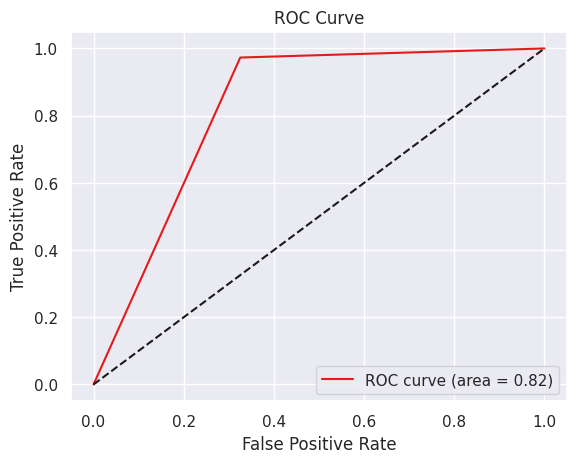

AUC: 0.8237880737880738


In [ ]:
# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, y_pred_logreg)
fpr, tpr, _ = roc_curve(y_test, y_pred_logreg)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC:", roc_auc)

AUC provides an aggregate measure of performance across all possible classification thresholds. Higher AUC indicates better overall performance of the model in terms of distinguishing between positive and negative classes. Since our AUC score is 0.82, then it indicates that our model is robust to predict the label of unseen data.

### <b>5.4.2. Learning Curve

A learning curve is a graphical representation that shows how the performance of a machine learning model changes as the amount of training data increases. It plots the model's performance metric (in this case: Recall) on the y-axis against the number of training examples or training sizes on the x-axis. It helps to understand how well a model generalizes as more data is provided.

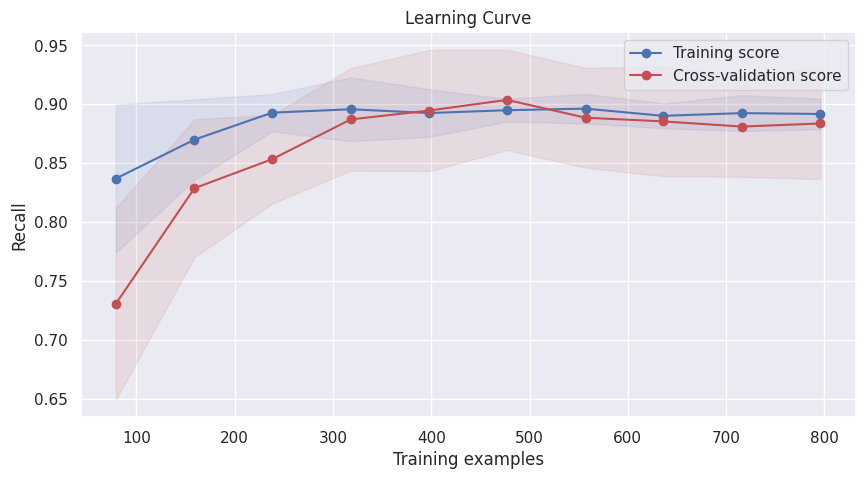

In [ ]:
# Create learning curve
train_sizes, train_scores, test_scores = \
    learning_curve(logreg_model, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
                   train_sizes=np.linspace(0.1, 1.0, 10), scoring='recall', n_jobs=-1)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Recall")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Initially, both the training and cross-validation scores increase as more training examples are added. This indicates that the model benefits from more data and improves its performance. The gap between the training and cross-validation scores is relatively small throughout the curve. This indicates that the model has a good balance between bias and variance and is not suffering from severe overfitting or underfitting.

### <b>5.4.3. Calibration Curve

A calibration curve in the context of machine learning and classification tasks is a graphical tool used to assess how well probabilistic predictions from a classification model align with the actual outcomes or frequencies of those predictions. It helps to evaluate whether the predicted probabilities reflect the true likelihood of a positive outcome (in this case: booking being canceled).

or example, if our model predicts a probability of 0.8 for a certain event, we would expect that event to occur approximately 80% of the time when the model makes such predictions. The calibration curve visually compares these predicted probabilities against the actual frequencies, providing insights into the reliability and accuracy of the model's probabilistic forecasts.

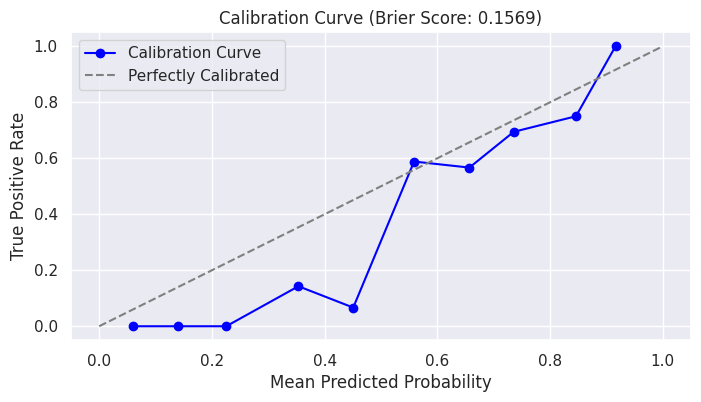

Brier Score: 0.15694343536770766


In [ ]:
# Predict probabilities on the test set
probabilities = logreg_model.predict_proba(X_test)[:, 1]

# Compute calibration curve
true_prob, predicted_prob = calibration_curve(y_test, probabilities, n_bins=10)
# Calculate Brier score
brier = brier_score_loss(y_test, probabilities)

# Plot calibration curve
plt.figure(figsize=(8, 4))
plt.plot(predicted_prob, true_prob, marker='o', linestyle='-', color='blue', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Positive Rate')
plt.title('Calibration Curve (Brier Score: {:.4f})'.format(brier))
plt.legend()
plt.grid(True)
plt.show()

print('Brier Score:', brier)

The Brier score, named after Glenn Brier, is a metric used to evaluate the accuracy of probabilistic predictions made by a classification model. It measures the mean squared difference between predicted probabilities (of the positive class, for example) and the actual outcomes (binary labels).

* A lower Brier score indicates better calibration and better prediction accuracy of probabilities, meaning the predicted probabilities are closer to the actual outcomes.
* In our model, Brier score is approximately 0.1569, which indicates how well-calibrated the predicted probabilities are.

## <b>5.4.4. Permutation Importance  


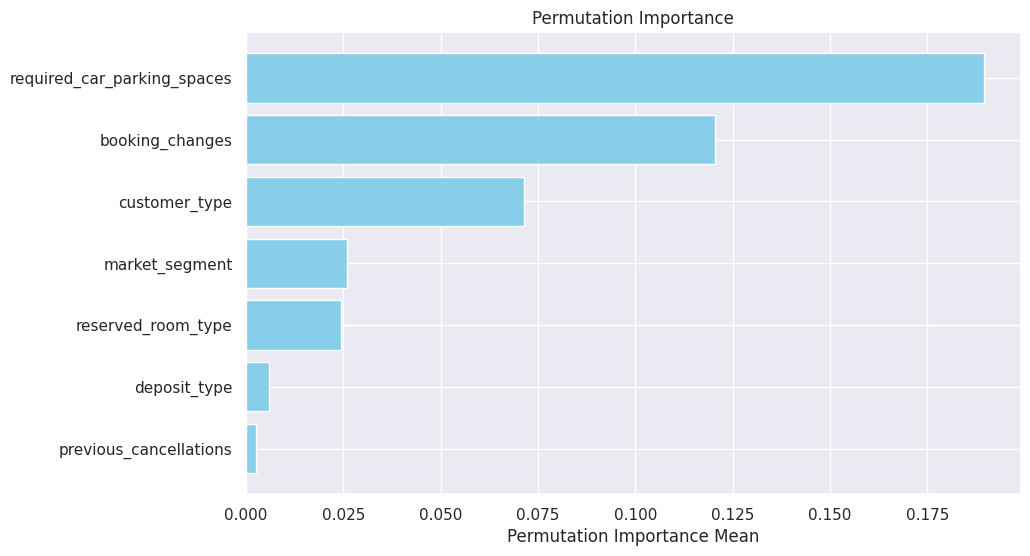

In [ ]:
# Fit model
logreg_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(logreg_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
})

# Sort by importance mean
perm_importance_df = perm_importance_df.sort_values(by='Importance Mean', ascending=False)

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance Mean'], color='skyblue')
plt.xlabel('Permutation Importance Mean')
plt.title('Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

Based on the permutation importance plot, we can conclude that the following features have the highest impact on predicting booking cancellations for the Ruby Hotel:

* Required Car Parking Spaces   
This feature has the highest permutation importance, indicating it plays a significant role in the prediction model. The availability or requirement of car parking spaces might be strongly correlated with the likelihood of booking cancellations.

* Booking Changes   
This feature is the second most important. Changes to bookings, such as modifications in required car parking space or room types, could be a strong indicator of potential cancellations.

* Customer Type   
This feature also has a significant influence on predictions. Different customer types (e.g., group, transient) may have varying cancellation behaviors.

* Market Segment   
This feature shows moderate importance. The market segment (e.g., online travel agencies, direct bookings) can influence the likelihood of cancellations.

* Reserved Room Type, Deposit Type, and Previous Cancellations  
These three features are the less importance on predicting booking cancellations.








# <b>6. Conclusions and Recommendations

## <b>6.1. Conclusions  

The combination of advanced preprocessing techniques, resampling methods, and robust modeling strategies led to the development of an effective predictive model for booking cancellations. The high recall and low revenue loss achieved by the Logistic Regression model demonstrate its potential to significantly improve hotel management and financial performance. This project highlights the value of data-driven decision-making in the hospitality industry, offering a practical solution to a common and costly problem.

## <b>6.2. Business Simulation

**4. Scenario with Modeling**

Based on the confusion matrix, we can calculate the cost saving calculation from 200 unseen data. Actually, we already got this number from our evaluation metrics from our model, but this is the calculation behind it.

TP (Predict Canceled, Actual Not Canceled) : 72    
TN (Predict Not Canceled, Actual Not Canceled) : 85   
FP (Predict Canceled, Actual Not Canceled) : 41  
FN (Predict Not Canceled, Actual Canceled) : 2  

Given the matrix above :    
TP : 72 x \$13.46 = \$969.12  
FP : 41 x \$13.46 = \$551.86  
FN : 2 x \$99 = \$198

**Total Revenue Loss** : $1,718.98  


**5. Comparison:**

* **Without modeling:**  
  Potential revenue loss: $22,492.

* **With modeling**:  
  Potential revenue loss: $1,718.98.

* **Impact of modeling:**  
  Reduction in potential revenue loss: \$22,492 - \$1,718.98 = **\$20,773.02**   
  The model can save $20,773.
  

## <b>6.3. Model Limitation

* Model limitation from the feature and data are based on the features that has been used for modelling.  
* Because we don't have date and time features, the limitation of the model may not accurate as it is.  

In [ ]:
# Feature check
X_train.columns

Index(['market_segment', 'previous_cancellations', 'booking_changes',
       'deposit_type', 'customer_type', 'reserved_room_type',
       'required_car_parking_spaces'],
      dtype='object')

In [ ]:
# Numerical Features Check
X_train.describe().round()

,previous_cancellations,booking_changes,required_car_parking_spaces
count,796.0,796.0,796.0
mean,1.0,2.0,0.0
std,2.0,2.0,1.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,1.0,0.0
75%,0.0,2.0,1.0
max,26.0,21.0,8.0


In [ ]:
# Categorical Features Check
## Market Segment
X_train['market_segment'].unique()

array(['Online TA', 'Complementary', 'Groups', 'Corporate', 'Aviation',
       'Direct', 'Offline TA/TO'], dtype=object)

In [ ]:
# Reserved Room Type
X_train['reserved_room_type'].unique()

array(['D', 'C', 'A', 'H', 'G', 'B', 'E', 'F', 'P', 'L'], dtype=object)

In [ ]:
# Customer Type
X_train['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

In [ ]:
# Deposit Type
X_train['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

## <b>6.4. Recommendations

### <b>6.4.1. Business Insights

* **Focus on Parking**   
Since required car parking spaces are highly influential, ensuring ample parking availability or understanding the specific parking needs of guests might help reduce cancellations.

* **Monitor Booking Changes**   
Keeping track of and managing booking changes can provide early warnings for potential cancellations.

* **Targeted Customer Strategies**   
Understanding the cancellation behaviors of different customer types and market segments can help in creating targeted strategies to reduce cancellations.

* **Flexible Room Policies**   
Analyzing the impact of reserved room types and deposit policies might help in designing more flexible booking and cancellation policies.  

* **Room Price per Each Room Type**
Since we only have the average room price, it's better to collect the room price of each room type, thus we can calculate the revenue loss per room type. We can do this in next model evaluation to see whether the model can adjust each type of room.

By addressing these key features, Ruby Hotel can better predict and manage booking cancellations, potentially reducing revenue loss and optimizing operational strategies.

### <b>6.4.2. Who Will Use the Model  

**Finance Team**

  * Dynamic Pricing: Adjust pricing strategies based on the predicted likelihood of cancellations to maximize revenue.
  * Booking Policies: Implement flexible booking policies and incentives for customers predicted to cancel to encourage them to retain their bookings.  
  * Revenue Forecasting: Use predictions to create more accurate revenue forecasts and financial models.
  * Cost Management: Analyze the financial impact of cancellations and implement cost-saving measures based on predictive insights.

**Marketing Team**

  * Campaign Targeting: Use the model's predictions to identify customers likely to cancel and design targeted marketing campaigns to retain them. This may need another machine learning model.
  * Budget Optimization: Allocate marketing resources more efficiently by focusing on customers with a higher risk of cancellation.

### <b>6.4.3. When the Model Will be Used

* **Real-Time Predictions**   
  Implement the model to provide real-time predictions when a customer makes a reservation. This allows for immediate actions, such as offering incentives for non-cancelable bookings or identifying high-risk bookings that may require additional attention.

* **Daily Batch Processing**

  Overnight or Early Morning: Run the model daily, preferably overnight or early in the morning, to process all new bookings and update predictions for existing bookings. This ensures that the latest information is available for the day's operations and decision-making.

* **Pre-Arrival Confirmation**

  1-2 Weeks Before Check-In: Use the model to reassess the likelihood of cancellations for bookings scheduled to check in within the next 1-2 weeks. This allows the hotel to take proactive measures to confirm reservations, such as sending reminders or offering special incentives to secure the booking.

* **Weekly Operational Planning**

  * Beginning of Each Week: Run the model at the start of each week to update predictions and assist in operational planning. This helps the operations team allocate resources, manage staff schedules, and adjust room availability based on anticipated cancellations.
  * Monthly and Quarterly Reviews: End of Each Month/Quarter: Use the model's insights to conduct monthly and quarterly reviews. This helps in strategic planning, budgeting, and adjusting marketing strategies based on trends and patterns observed in the predictions.

By implementing this predictive model, Ruby Hotel can effectively manage booking cancellations, optimize revenue, and enhance customer satisfaction, thereby maintaining its reputation as a premier five-star destination.

#References

[Budget Your Trip](https://www.budgetyourtrip.com/portugal) - Hotel room in portugal

[Deloitte](https://blog.hubspot.com/marketing/marketing-budget-percentage) - Digital Marketing Budget

[Hospitality Net](https://www.hospitalitynet.org/opinion/4082318.html) - Four Segments of Hospitality Industry
